# **ИТОГОВАЯ РАБОТА ПО КУРСУ 'PYTHON ДЛЯ АНАЛИЗА ДАННЫХ'**



---



# ЗАДАНИЕ

**Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.**  
<br>

**Признаки:**
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **last_evaluation** - Время с момента последней оценки в годах
3. **number_project** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты


**Требуется выполнить следующее задание:**

<br>



1. Загрузите файл HR.csv в pandas dataframe.

<br>

2. Рассчитайте основные статистики для переменных
(среднее, медиана, мода, мин/макс, сред.отклонение).

<br>

3. Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

<br>

4. Рассчитайте, сколько сотрудников работает в каждом
департаменте.

<br>

5. Показать распределение сотрудников по зарплатам.

<br>

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.

<br>

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.

<br>

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

> ● Доля сотрудников с повышением за последние 5 лет.

> ● Средняя степень удовлетворенности.

> ● Среднее количество проектов.

<br>

9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборке.

<br>

10. Загрузить jupyter notebook с решением на github и прислать ссылку.




---



In [ ]:
# Импорт библиотек, которые будут применены в дальнейшем:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



---



## **ЗАДАНИЕ 1**

**Загрузите файл HR.csv в pandas dataframe.**

In [ ]:
# Подключение к Google-Диску:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка содержимого файла HR.csv в датафрейм df_hr -
# при этом прописан путь к файлу на Google-Диске, с учетом всех вложенных папок:

df_hr = pd.read_csv('/content/drive/MyDrive/НЕТОЛОГИЯ/\
PYTHON FOR DATA ANALYSIS COURSE/FINAL WORK/HR.csv')

In [ ]:
# Проверка корректности загрузки файла HR.csv в датафрейм df_hr -
# вывод первых пяти строк датафрейма для ознакомления с данными:

df_hr.head()

# Таким образом, файл HR.csv был корректно загружен в датафрейм df_hr.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Исправление названий полей, содержащих ошибки:

df_hr.rename(columns = {'average_montly_hours' : 'average_monthly_hours',\
                        'Work_accident' : 'work_accident'}, inplace=True)

In [ ]:
# Проверка правильности исправления названий полей, содержащих ошибки:

df_hr.head()

# Корректировка названий произошла

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Ознакомимся с основными характеристиками датафрейма df_hr:

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Итак, в датафрейме df_hr 14999 строк и 10 столбцов (полей, признаков).

<br>


При этом по всем признакам отсутствуют пустые (незаполненные, NaN)
значения, что является благоприятным фактором.

<br>


Типы данных в целом для признаков были распознаны следующим образом.

Так, в датафрейме присутствуют два признака с типом данных
float64 - вещественные числа:
- satisfaction_level;
- last_evaluation.


Шесть признаков с типом данных int64 - целые числа:
- number_project;
- average_monthly_hours;
- time_spend_company;
- work_accident;
- left;
- promotion_last_5years.

Два признака с типом данных object -
в данном случае, строковый тип данных:
- department;
- salary.

In [ ]:
# Ознакомимся подробнее с признаками с типом данных object:

In [ ]:
df_hr['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [ ]:
df_hr['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [ ]:
# Как видим, признаки department и salary представляют собой
# категориальные переменные, и можно для данных признаков
# изменить тип данных (что оправданно с точки зрения оптимизации
# использования памяти и использования дополнительных возможностей
# для типа данных category в дальнейшем):

df_hr['department'] = df_hr['department'].astype('category')
df_hr['salary'] = df_hr['salary'].astype('category')

In [ ]:
# Проверка корректности преобразования типа данных для признаков
# department и salary в category:

df_hr.dtypes

# Преобразование типов данных было произведено

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
department               category
salary                   category
dtype: object

In [ ]:
df_hr.info()

# Можно заметить, как в результате предшествующей манипуляции
# с изменением типа данных для признаков department и salary в category
# было достигнуто уменьшение объема используемой памяти
# memory usage с 1.1+ MB до 967.4 KB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: category(2), float64(2), int64(6)
memory usage: 967.4 KB


In [ ]:
# Однако на данном этапе можно выдвинуть предположение,
# что признаки work_accident, left и promotion_last_5years
# можно было бы также преобразовать в тип данных boolean.
# Для проверки этого предположения рассмотрим уникальные
# значения для упомянутых признаков:

In [ ]:
df_hr['work_accident'].value_counts()

work_accident
0    12830
1     2169
Name: count, dtype: int64

In [ ]:
df_hr['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
df_hr['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [ ]:
# В действительности, значения для признаков work_accident, left
# и promotion_last_5years представлены только 0 и 1,
# и могут быть преобразованы в тип данных boolean.

In [ ]:
# В дальнейшем будет проводиться анализ по описательным статистикам,
# и для этих целей будет более целесообразно преобразовать тип данных
# для признаков work_accident, left и promotion_last_5years
# в тип данных boolean - булевы значения:

# Сохранение независимой копии в новый датафрейм:
df_hr_2 = df_hr.copy(deep=True)

df_hr_2['work_accident'] = df_hr_2[['work_accident']].astype(bool)
df_hr_2['left'] = df_hr_2[['left']].astype(bool)
df_hr_2['promotion_last_5years'] = df_hr_2[['promotion_last_5years']].astype(bool)

In [ ]:
# Проверка корректности преобразования типа данных для признаков
# work_accident, left и promotion_last_5years в boolean:

df_hr_2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,False,True,False,sales,low
1,0.80,0.86,5,262,6,False,True,False,sales,medium
2,0.11,0.88,7,272,4,False,True,False,sales,medium
3,0.72,0.87,5,223,5,False,True,False,sales,low
4,0.37,0.52,2,159,3,False,True,False,sales,low


In [ ]:
df_hr_2.dtypes

# Итак, преобразование типа данных для признака left в boolean
# было произведено корректно:

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
work_accident                bool
left                         bool
promotion_last_5years        bool
department               category
salary                   category
dtype: object



---



## **ЗАДАНИЕ 2**

**Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).**

In [ ]:
# ВАРИАНТ 1

In [ ]:
# С целью расчета основных статистик для переменных
# наиболее простым решением будет воспользоваться встроенным методом в pandas
# - describe().

In [ ]:
# Расчет основных статистик для числовых переменных
# (в методе describe() вывод статистик для числовых переменных производится
# по умолчанию):

df_hr_2.describe()

# Так, искомые статистики представлены следующим образом:
# среднее - mean;
# медиана - 50% (т.е. 50% перцентиль);
# мин/макс - min и max;
# сред.отклонение - std.

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
# Статистику мода для числовых признаков нужно будет рассчитать отдельно:

for name in df_hr_2.columns:
    if (df_hr_2[name].dtype == 'float64') or (df_hr_2[name].dtype == 'int64'):
        print(f'Мода для признака {name}: {df_hr_2[name].mode().iloc[0]}')


Мода для признака satisfaction_level: 0.1
Мода для признака last_evaluation: 0.55
Мода для признака number_project: 4
Мода для признака average_monthly_hours: 135
Мода для признака time_spend_company: 3


In [ ]:
# Расчет основных статистик для категориальных переменных
# (в методе describe() вывод статистик для категориальных переменных
# может быть произведен при указании параметра include=['category']):

df_hr_2.describe(include=['category'])

# Здесь статистика мода представлена характеристикой top,
# т.е. значением, которое встречается для данного признака
# чаще всего. При этом freq показывает частоту для значения,
# которое встречается чаще всего.
# А unique дает представление о том, сколько уникальных
# значений имеется для каждого признака.

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [ ]:
# Расчет основных статистик для переменных типа boolean
# (в методе describe() вывод статистик для переменных типа boolean
# может быть произведен при указании параметра include=[bool]):

df_hr_2.describe(include=[bool])

# Здесь статистика мода представлена характеристикой top,
# т.е. значением, которое встречается для данного признака
# чаще всего. При этом freq показывает частоту для значения,
# которое встречается чаще всего.
# А unique дает представление о том, сколько уникальных
# значений имеется для каждого признака - здесь их
# ожидаемо только два - True и False.

,work_accident,left,promotion_last_5years
count,14999,14999,14999
unique,2,2,2
top,False,False,False
freq,12830,11428,14680


In [ ]:
# ВАРИАНТ 2

In [ ]:
# Расчет требуемых статистик с использованием специальных методов

In [ ]:
# Сохранение в датафрейм полей, содержащих числовой тип данных:

df_hr_2_numeric = df_hr_2.select_dtypes(include=['float64', 'int64'])

df_hr_2_numeric

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [ ]:
# Расчет среднего для признаков с числовым типом данных:

df_hr_2_numeric_mean = df_hr_2_numeric.mean()
df_hr_2_numeric_mean

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_monthly_hours    201.050337
time_spend_company         3.498233
dtype: float64

In [ ]:
# Расчет медианы для признаков с числовым типом данных:

df_hr_2_numeric_median = df_hr_2_numeric.median()
df_hr_2_numeric_median

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_monthly_hours    200.00
time_spend_company         3.00
dtype: float64

In [ ]:
# Расчет моды для признаков с числовым типом данных:

df_hr_2_numeric_mode = df_hr_2_numeric.mode()
df_hr_2_numeric_mode

# Столкнулись со случаем, когда у нас два значения моды для признака
# average_monthly_hours, т.е. оба значения (135 и 156) являются
# наиболее часто встречающимися

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [ ]:
# Усредним значения по признакам, чтобы получить для признака
# average_monthly_hours одно значение моды как среднее между двумя:

df_hr_2_numeric_mode = df_hr_2_numeric.mode().mean()
df_hr_2_numeric_mode

satisfaction_level         0.10
last_evaluation            0.55
number_project             4.00
average_monthly_hours    145.50
time_spend_company         3.00
dtype: float64

In [ ]:
# Расчет максимального значения для признаков с числовым типом данных:

df_hr_2_numeric_max = df_hr_2_numeric.max()
df_hr_2_numeric_max

satisfaction_level         1.0
last_evaluation            1.0
number_project             7.0
average_monthly_hours    310.0
time_spend_company        10.0
dtype: float64

In [ ]:
# Расчет минимального значения для признаков с числовым типом данных:

df_hr_2_numeric_min = df_hr_2_numeric.min()
df_hr_2_numeric_min

satisfaction_level        0.09
last_evaluation           0.36
number_project            2.00
average_monthly_hours    96.00
time_spend_company        2.00
dtype: float64

In [ ]:
# Расчет среднеквадратического отклонения для признаков с числовым типом данных:

df_hr_2_numeric_std = df_hr_2_numeric.std()
df_hr_2_numeric_std

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_monthly_hours    49.943099
time_spend_company        1.460136
dtype: float64

In [ ]:
# Сводный датафрейм с основными статистиками для признаков
# с числовым типом данных:

df_hr_2_numeric_common = pd.concat([df_hr_2_numeric_mean,
                                    df_hr_2_numeric_median,
                                    df_hr_2_numeric_mode,
                                    df_hr_2_numeric_max,
                                    df_hr_2_numeric_min,
                                    df_hr_2_numeric_std], axis=1)
df_hr_2_numeric_common.columns = ['Среднее', 'Медиана', 'Мода', 'Максимум', \
                                  'Минимум', 'Среднеквадр. отклонение']

df_hr_2_numeric_common

,Среднее,Медиана,Мода,Максимум,Минимум,Среднеквадр. отклонение
satisfaction_level,0.612834,0.64,0.10,1.0,0.09,0.248631
last_evaluation,0.716102,0.72,0.55,1.0,0.36,0.171169
number_project,3.803054,4.00,4.00,7.0,2.00,1.232592
average_monthly_hours,201.050337,200.00,145.50,310.0,96.00,49.943099
time_spend_company,3.498233,3.00,3.00,10.0,2.00,1.460136


In [ ]:
# Сохранение в датафрейм полей, содержащих булев тип данных:

df_hr_2_boolean = df_hr_2.select_dtypes(include=[bool])
df_hr_2_boolean

,work_accident,left,promotion_last_5years
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [ ]:
# Расчет моды для признаков с булевым типом данных:

df_hr_2_boolean_mode = df_hr_2_boolean.mode()
df_hr_2_boolean_mode

,work_accident,left,promotion_last_5years
0,False,False,False


In [ ]:
# Сохранение в датафрейм полей, содержащих тип данных category:

df_hr_2_category = df_hr_2.select_dtypes(include=['category'])
df_hr_2_category

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [ ]:
# Расчет моды для признаков с типом данных category:

df_hr_2_category_mode = df_hr_2_category.mode()
df_hr_2_category_mode

,department,salary
0,sales,low


In [ ]:
# Можем узнать больше о распределении частот
# в разрезе уникальных значений для категориальных признаков:

In [ ]:
df_hr_2['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [ ]:
df_hr_2['department'].value_counts(normalize=True)

department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64

In [ ]:
df_hr_2['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [ ]:
df_hr_2['salary'].value_counts(normalize=True)

salary
low       0.487766
medium    0.429762
high      0.082472
Name: proportion, dtype: float64

In [ ]:
# ----------------------------------------------

In [ ]:
# Для того чтобы получить дополнительное представление о статистических
# характеристиках для количественных переменных, можно обратиться к визуализациям
# 'ящик с усами'

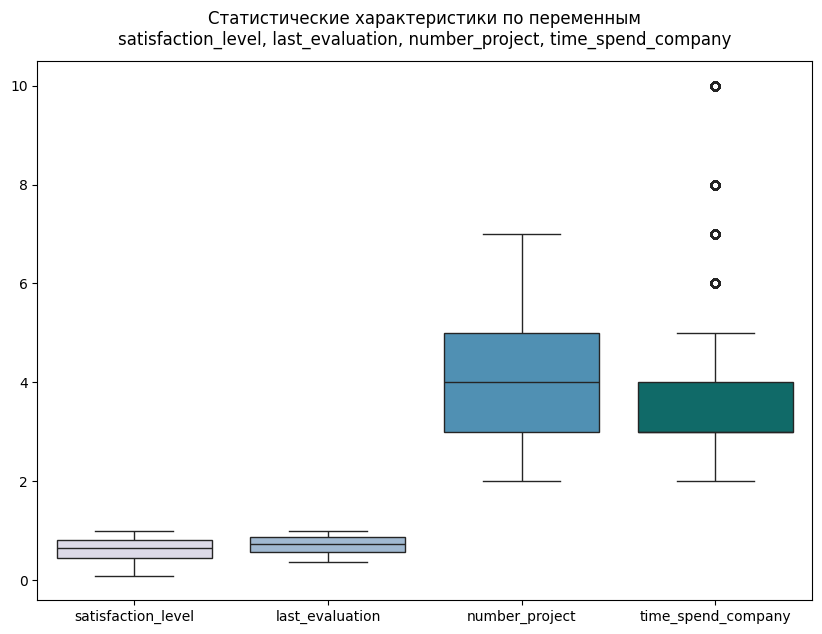

In [ ]:
plt.figure(figsize=(10, 7))

sns.boxplot(data = df_hr_2[['satisfaction_level','last_evaluation',\
                            'number_project', 'time_spend_company']], \
            palette='PuBuGn')

plt.title('Статистические характеристики по переменным\nsatisfaction_level, \
last_evaluation, number_project, time_spend_company',
fontdict={'fontsize':12}, pad=12)

plt.show()

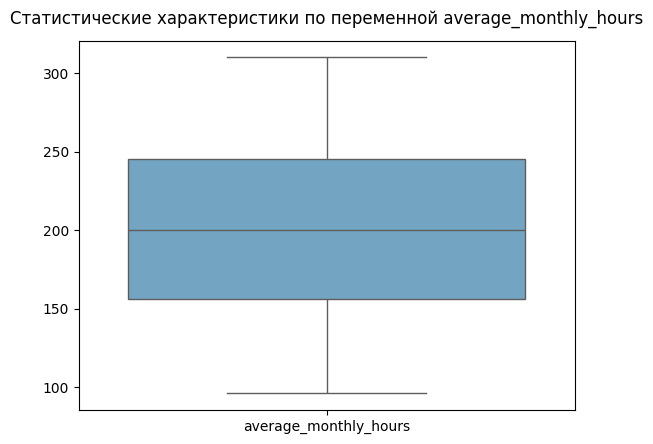

In [ ]:
# Рассмотрим визуализацию 'ящик с усами' по переменной average_monthly_hours
# на отдельной диаграмме, т.к. данная переменная отличается от предыдущих
# порядком значений, и представление всех этих переменных на одной
# диаграмме исказит общую визуализацию:

sns.boxplot(data = df_hr_2[['average_monthly_hours']], palette='PuBuGn')

plt.title('Статистические характеристики по переменной average_monthly_hours',
fontdict={'fontsize':12}, pad=12)

plt.show()

In [ ]:
# Интересно отметить, что рассмотренные переменные распределены
# равномерно относительно медиан. И благоприятно также то, что
# для них отсутствуют выбросы.
# Исключение составляет только переменная time_spend_company.
# Рассмотрим выбросы для переменной time_spend_company подробнее.

In [ ]:
# Как видим, основываясь на визуализации 'ящик с усами', к выбросам
# по переменной time_spend_company можно отнести те значения,
# которые превышают значение 5 лет. Таких наблюдений обнаружено 1282,
# т.е. около 8,5% всего датасета:

df_hr_2[df_hr_2['time_spend_company'] > 5]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,False,True,False,sales,medium
17,0.78,0.99,4,255,6,False,True,False,sales,low
34,0.84,0.87,4,246,6,False,True,False,hr,low
47,0.57,0.70,3,273,6,False,True,False,support,low
67,0.90,0.98,4,264,6,False,True,False,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
14942,0.20,0.50,5,135,6,False,True,False,RandD,low
14947,0.91,0.98,4,242,6,False,True,False,support,low
14977,0.81,0.85,4,251,6,False,True,False,hr,medium
14986,0.85,0.85,4,247,6,False,True,False,technical,low


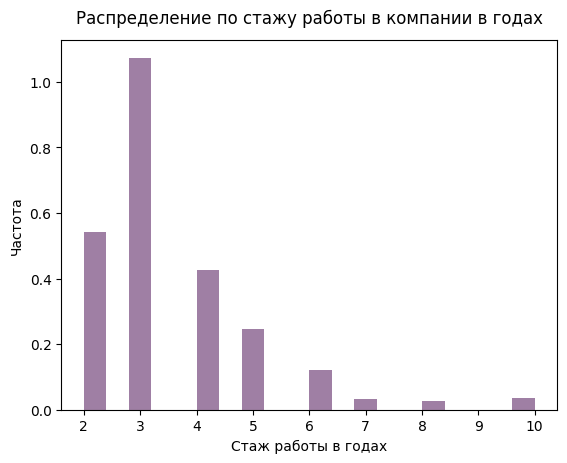

In [ ]:
# Рассмотрим распределение по переменной time_spend_company
# подробнее, применяя визуализацию - гистограмму распределения

cm = plt.get_cmap('PRGn')

df_hr_2['time_spend_company'].plot(kind='hist',
                     alpha=0.5,
                     bins=20,
                     density=True,
                     cmap=cm)

plt.xlabel('Стаж работы в годах')
plt.ylabel('Частота')

plt.title('Распределение по стажу работы в компании в годах',
fontdict = {'fontsize':12}, pad = 12)

plt.show()

# Действительно, основная масса сотрудников имеет стаж не более 5 лет.
# И заметно выделяется на фоне остальных значений отметка в 3 года -
# она встречается наиболее часто.

Таким образом, основываясь на предшествовавшем рассмотрении статистических характеристик переменных, можно прийти к следующим выводам.

Почти для всех числовых переменных характерна ситуация, когда среднее значение и медиана практически не отличаются, т.е. нет заметного смещения в данных, что подтверждается отсутствием выбросов.
И только для переменной time_spend_company наблюдается ситуация, когда средний стаж работы в компании составлял 3,5 года, в то время как медианное значение - 3 года, т.е. половина сотрудников проработала в компании не более 3 лет.

Средний уровень удовлетворенности работой составляет 0,61.

Среднее время в годах с момента последней оценки - 0.71.

При этом половина сотрудников приняла участие за время работы не более чем в 4 проектах.

Среднее количество часов на рабочем месте в месяц составляет 201, но были и сотрудники проработавшие 310 часов, а также те, кто проработал только 96 часов.

14,5% сотрудников пережили несчастный случай на рабочем месте.

У 2,1% сотрудников было повышение за последние 5 лет.

А 23,8% сотрудников решились на увольнение.

Большинство работает в отделе продаж (27,6%).

При этом практически у половины (48,8%) низкий уровень зарплаты.




---



## **ЗАДАНИЕ 3**

**Рассчитайте и визуализируйте корреляционную матрицу для
количественных переменных.**

**Определите две самые скоррелированные и две наименее
скоррелированные переменные.**

In [ ]:
# Расчет корреляционной матрицы для количественных переменных:

df_hr_corr = df_hr.select_dtypes(exclude=['category']).corr()

df_hr_corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


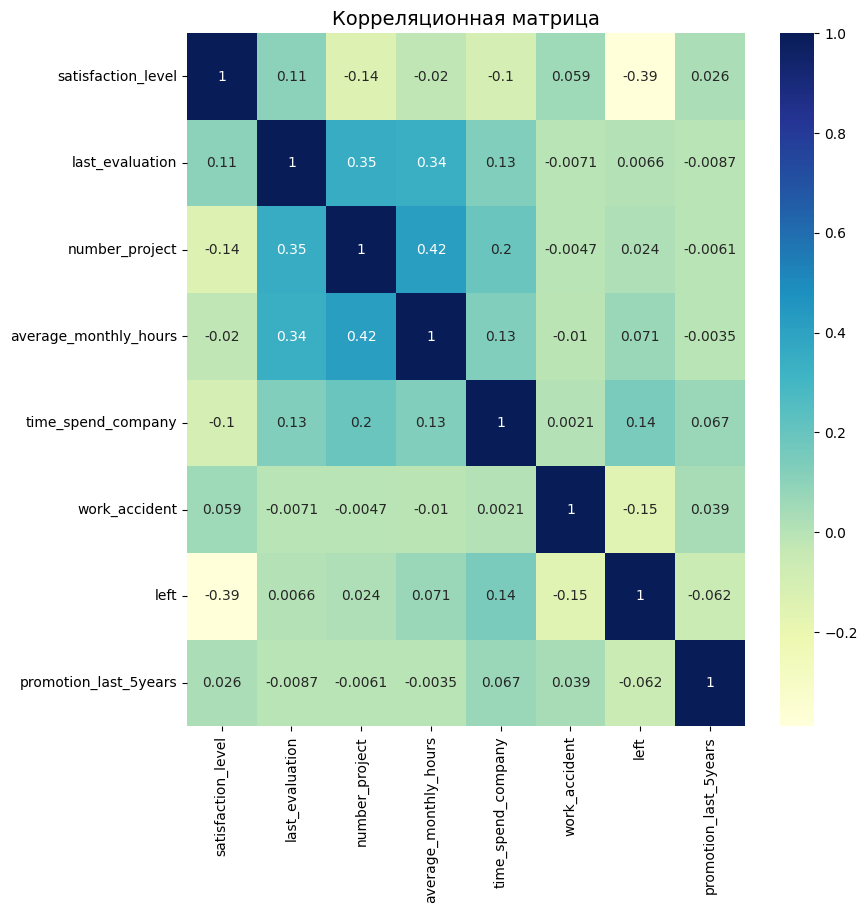

In [ ]:
# Визуализация корреляционной матрицы для количественных переменных
# (также для целей данного задания рассматриваются в т.ч. и булевы переменные,
# представленные как числовые):

plt.figure(figsize=(9, 9))

heatmap = sns.heatmap(df_hr_corr,
                      cmap='YlGnBu',
                      annot=True)

heatmap.set_title('Корреляционная матрица',
                  fontdict={'fontsize':14})

plt.show()

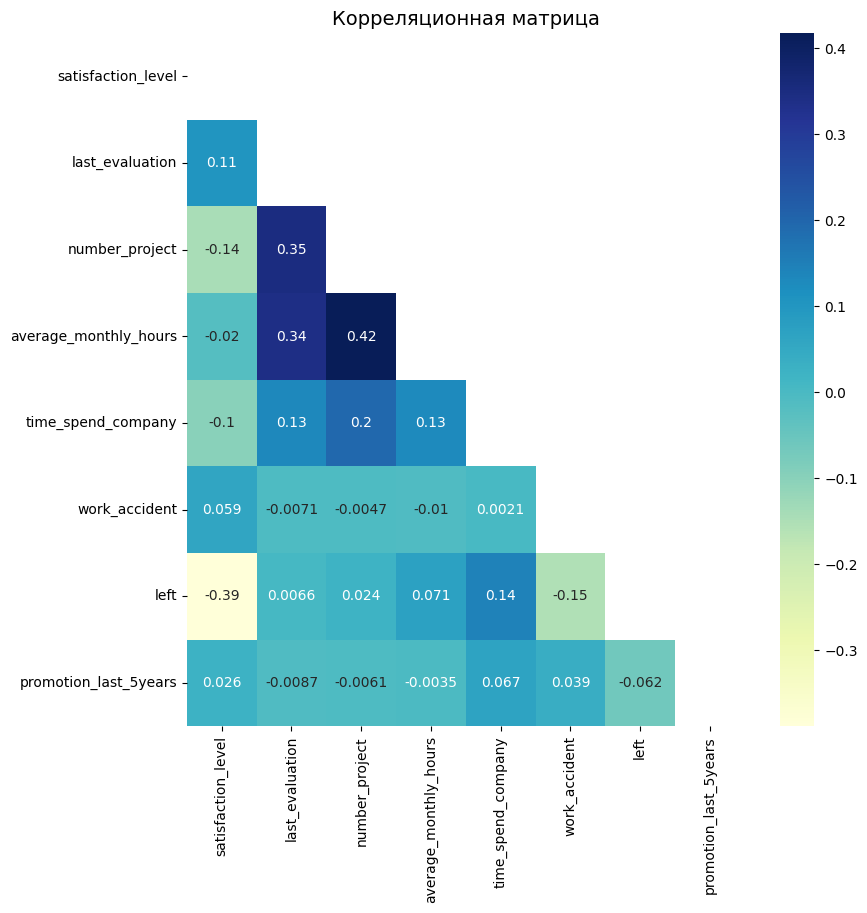

In [ ]:
# Визуализация корреляционной матрицы для количественных переменных
# (оставим только половину матрицы (т.к. значения показателей корреляции
# дублируются для 'зеркальных' пар переменных)):

plt.figure(figsize=(9, 9))

mask = np.zeros_like(df_hr_corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True
heatmap = sns.heatmap(df_hr_corr,
                      mask=mask,
                      cmap='YlGnBu',
                      annot=True)

heatmap.set_title('Корреляционная матрица', \
                    fontdict={'fontsize':14})

plt.show()

In [ ]:
# Создадим словарь, в состав которого в качестве ключей будут входить
# пары признаков (при этом будут отсеяны значения корреляций признака
# с самим собой, а также 'зеркальные' пары признаков),
# а в качестве значений будут выступать значения корреляций
# (по модулю - чтобы оценививать именно силу связи, не учитывая
# знак показателя):

df_hr_corr_dict = {}

for i in range(len(df_hr_corr.columns)):
    for j in range(len(df_hr_corr.columns)):

        # фильтрация пар признаков, чтобы отсеять значения корреляций
        # признака с самим собой, а также 'зеркальные' пары признаков:
        if i > j:
            corr_pair = df_hr_corr.columns[i] + ' - ' + df_hr_corr.columns[j]
            df_hr_corr_dict[corr_pair] = round(abs(df_hr_corr.iloc[i, j]), 4)

df_hr_corr_dict

{'last_evaluation - satisfaction_level': 0.105,
 'number_project - satisfaction_level': 0.143,
 'number_project - last_evaluation': 0.3493,
 'average_monthly_hours - satisfaction_level': 0.02,
 'average_monthly_hours - last_evaluation': 0.3397,
 'average_monthly_hours - number_project': 0.4172,
 'time_spend_company - satisfaction_level': 0.1009,
 'time_spend_company - last_evaluation': 0.1316,
 'time_spend_company - number_project': 0.1968,
 'time_spend_company - average_monthly_hours': 0.1278,
 'work_accident - satisfaction_level': 0.0587,
 'work_accident - last_evaluation': 0.0071,
 'work_accident - number_project': 0.0047,
 'work_accident - average_monthly_hours': 0.0101,
 'work_accident - time_spend_company': 0.0021,
 'left - satisfaction_level': 0.3884,
 'left - last_evaluation': 0.0066,
 'left - number_project': 0.0238,
 'left - average_monthly_hours': 0.0713,
 'left - time_spend_company': 0.1448,
 'left - work_accident': 0.1546,
 'promotion_last_5years - satisfaction_level': 0.0

In [ ]:
# Отсортируем полученный на предыдущем шаге словарь в порядке убывания значения,
# т.е. показателя корреляции:

df_hr_corr_dict_sorted = sorted(df_hr_corr_dict.items(), key=lambda x: x[1], \
                                reverse=True)

df_hr_corr_dict_sorted

[('average_monthly_hours - number_project', 0.4172),
 ('left - satisfaction_level', 0.3884),
 ('number_project - last_evaluation', 0.3493),
 ('average_monthly_hours - last_evaluation', 0.3397),
 ('time_spend_company - number_project', 0.1968),
 ('left - work_accident', 0.1546),
 ('left - time_spend_company', 0.1448),
 ('number_project - satisfaction_level', 0.143),
 ('time_spend_company - last_evaluation', 0.1316),
 ('time_spend_company - average_monthly_hours', 0.1278),
 ('last_evaluation - satisfaction_level', 0.105),
 ('time_spend_company - satisfaction_level', 0.1009),
 ('left - average_monthly_hours', 0.0713),
 ('promotion_last_5years - time_spend_company', 0.0674),
 ('promotion_last_5years - left', 0.0618),
 ('work_accident - satisfaction_level', 0.0587),
 ('promotion_last_5years - work_accident', 0.0392),
 ('promotion_last_5years - satisfaction_level', 0.0256),
 ('left - number_project', 0.0238),
 ('average_monthly_hours - satisfaction_level', 0.02),
 ('work_accident - average_m

In [ ]:
# Также сохраним словарь, в котором значения корреляции представлены
# не по модулю, а с тем знаком, с которым они были представлены изначально:

df_hr_corr_dict_signs = {}

for i in range(len(df_hr_corr.columns)):
    for j in range(len(df_hr_corr.columns)):

        # фильтрация пар признаков, чтобы отсеять значения корреляций
        # признака с самим собой, а также 'зеркальные' пары признаков:
        if i > j:
            corr_pair = df_hr_corr.columns[i] + ' - ' + df_hr_corr.columns[j]
            df_hr_corr_dict_signs[corr_pair] = round(df_hr_corr.iloc[i, j], 4)

df_hr_corr_dict_signs

{'last_evaluation - satisfaction_level': 0.105,
 'number_project - satisfaction_level': -0.143,
 'number_project - last_evaluation': 0.3493,
 'average_monthly_hours - satisfaction_level': -0.02,
 'average_monthly_hours - last_evaluation': 0.3397,
 'average_monthly_hours - number_project': 0.4172,
 'time_spend_company - satisfaction_level': -0.1009,
 'time_spend_company - last_evaluation': 0.1316,
 'time_spend_company - number_project': 0.1968,
 'time_spend_company - average_monthly_hours': 0.1278,
 'work_accident - satisfaction_level': 0.0587,
 'work_accident - last_evaluation': -0.0071,
 'work_accident - number_project': -0.0047,
 'work_accident - average_monthly_hours': -0.0101,
 'work_accident - time_spend_company': 0.0021,
 'left - satisfaction_level': -0.3884,
 'left - last_evaluation': 0.0066,
 'left - number_project': 0.0238,
 'left - average_monthly_hours': 0.0713,
 'left - time_spend_company': 0.1448,
 'left - work_accident': -0.1546,
 'promotion_last_5years - satisfaction_lev

In [ ]:
# Определим две самые скоррелированные переменные:

# Задаем параметр динамически, чтобы была возможность более гибко
# задавать количество требуемых пар переменных:

n_top = 1

df_hr_corr_dict_sorted[:n_top]

[('average_monthly_hours - number_project', 0.4172)]

In [ ]:
# Проверим, каким был изначально знак рассчитанного показателя корреляции:

[df_hr_corr_dict_signs[i[0]] for i in df_hr_corr_dict_sorted[:n_top]]

[0.4172]

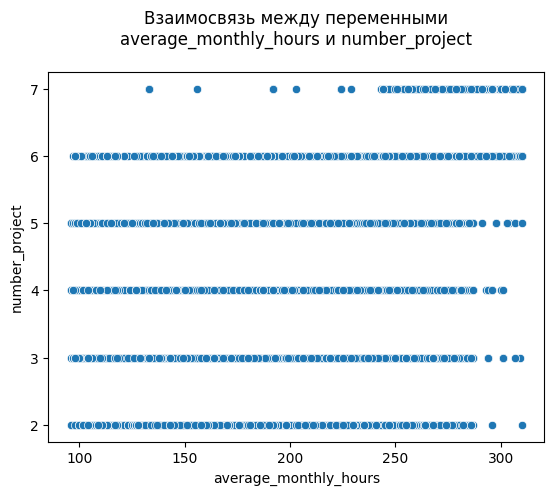

In [ ]:
# Визуализируем связь между переменными 'average_monthly_hours' и 'number_project':

sns.scatterplot(data=df_hr,
                x='average_monthly_hours',
                y='number_project')

plt.title('Взаимосвязь между переменными\naverage_monthly_hours и number_project',
fontdict={'fontsize':12}, pad=20)

plt.show()

In [ ]:
# Определим две наименее скоррелированные переменные:

# Задаем параметр динамически, чтобы была возможность более гибко
# задавать количество требуемых пар переменных:

n_bottom = 1

df_hr_corr_dict_sorted[len(df_hr_corr_dict_sorted) - n_bottom:]

[('work_accident - time_spend_company', 0.0021)]

In [ ]:
# Проверим, каким был изначально знак рассчитанного показателя корреляции:

[df_hr_corr_dict_signs[i[0]] for i in \
 df_hr_corr_dict_sorted[len(df_hr_corr_dict_sorted) - n_bottom:]]

[0.0021]

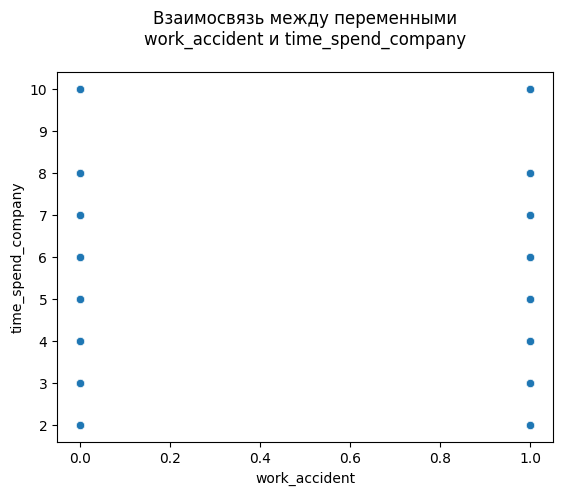

In [ ]:
# Визуализируем связь между переменными 'work_accident' и 'time_spend_company':

sns.scatterplot(data=df_hr,
                x='work_accident',
                y='time_spend_company')

plt.title('Взаимосвязь между переменными\nwork_accident и time_spend_company',
fontdict={'fontsize':12}, pad=20)

plt.show()

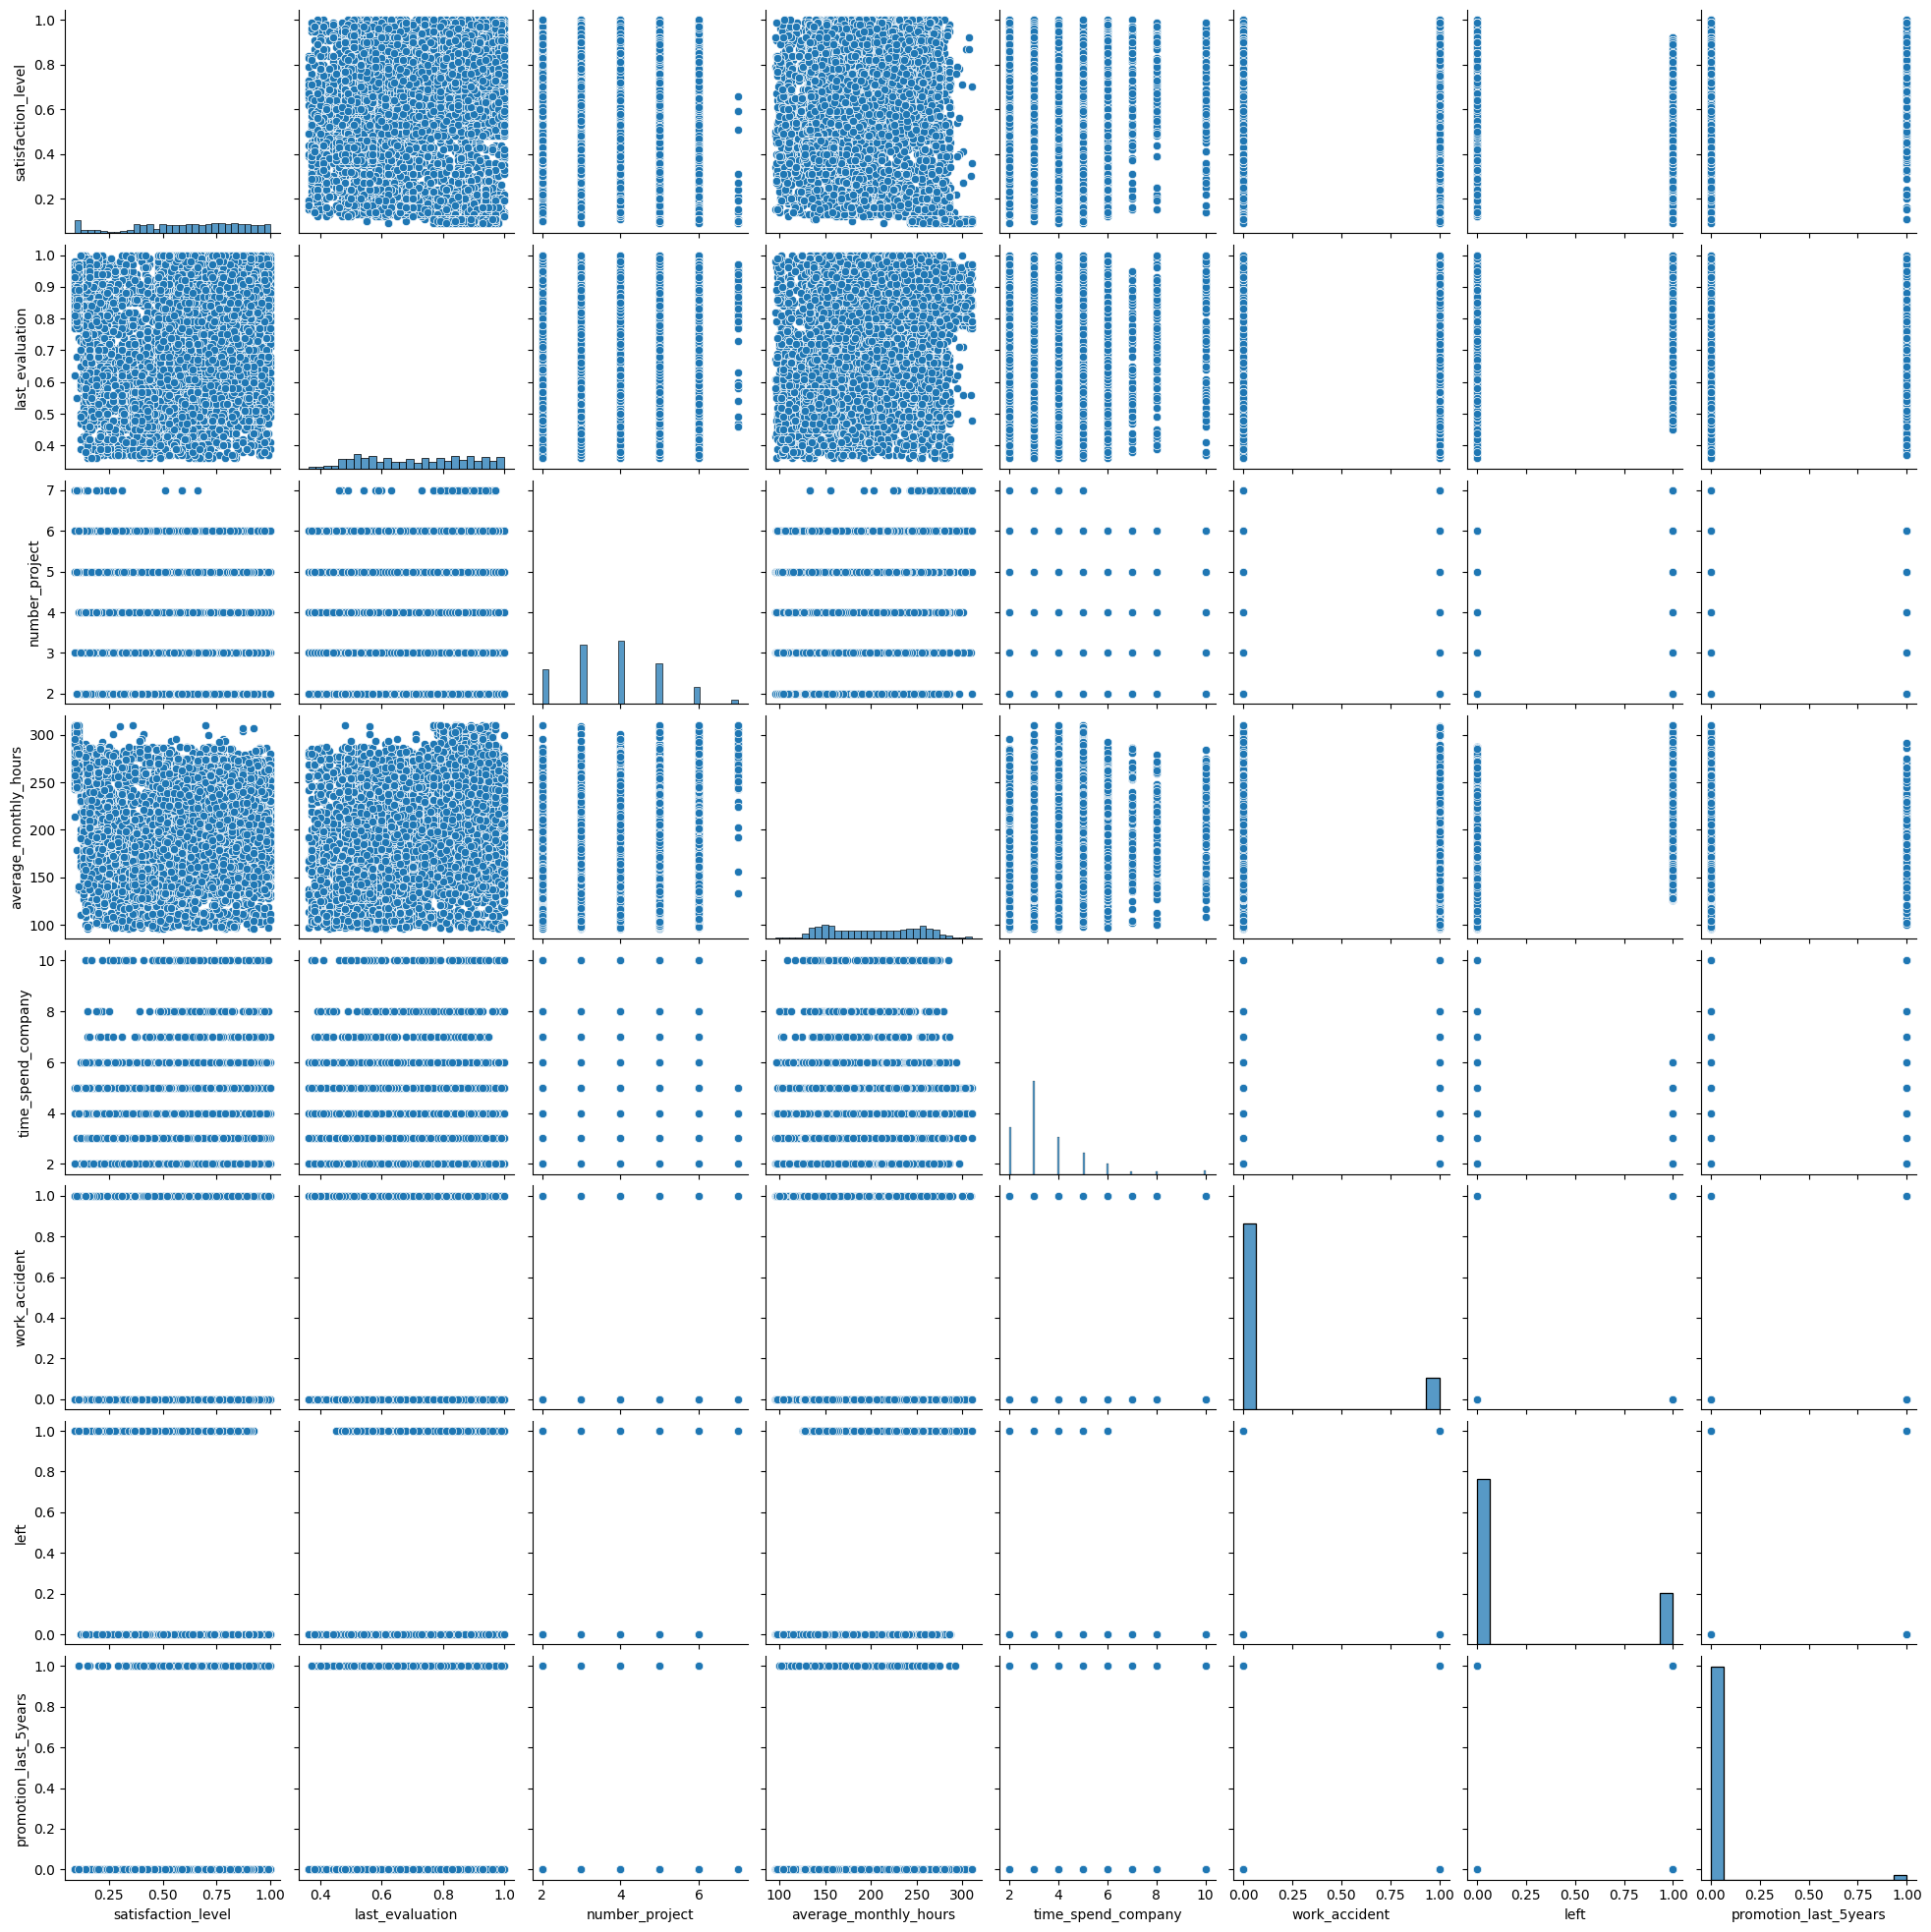

In [ ]:
# Также в дополнение можно визулизировать взаимосвязи между всеми
# парами количественных переменных в датафрейме:

sns.pairplot(df_hr)

plt.show()

Таким образом, парой наиболее скоррелированных переменных являются 'Среднее количество часов на рабочем месте в месяц' и 'Количество проектов, выполненных за время работы', что представляется логически объяснимым. При этом отметим, что само значение корреляции в данном случае не является высоким - показатель 0.4172 - ниже среднего. Знак показателя корреляции является положительным, следовательно корреляционная связь прямой направленности.
Заметим при этом, что корреляция показывает наличие именно линейной связи.

Парой наименее скоррелированных переменных являются 'Происходили ли несчастные случаи на рабочем месте с сотрудником' и 'Стаж работы в компании в годах'. Значение корреляции в данном случае очень низкое - 0.0021. Знак показателя корреляции является положительным, следовательно корреляционная связь прямая.



---





## **ЗАДАНИЕ 4**

**Рассчитайте, сколько сотрудников работает в каждом
департаменте.**

In [ ]:
# ВАРИАНТ 1

In [ ]:
# Проще всего выявить распределение сотрудников в разрезе департаментов,
# применяя метод value_counts():

df_hr['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [ ]:
df_hr['department'].value_counts(normalize=True)

department
sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: proportion, dtype: float64

In [ ]:
# Визуализация распределения сотрудников в разрезе департаментов

df_hr['department'].value_counts().to_frame().style.bar(align='mid', \
                                                        color='lightseagreen')

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
# ----------------------------------------------

In [ ]:
# ВАРИАНТ 2

In [ ]:
# С применением группировки и сортировки по убыванию

In [ ]:
df_hr.groupby(['department']).agg('count')['satisfaction_level'].\
sort_values(ascending=False)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: satisfaction_level, dtype: int64

In [ ]:
# ----------------------------------------------

In [ ]:
# ВАРИАНТ 3

In [ ]:
# С применением группировки, метода size() и сортировки по убыванию

In [ ]:
df_hr.groupby(['department']).size().sort_values(ascending=False)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

In [ ]:
# ----------------------------------------------

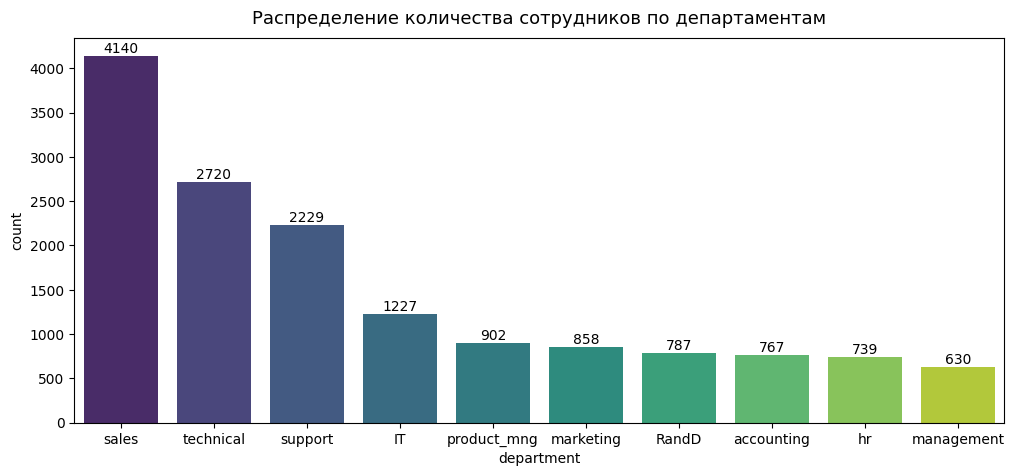

In [ ]:
# Визуализируем распределение количества сотрудников в разрезе департаментов:

plt.figure(figsize=(12, 5))

countplot = sns.countplot(x='department',
                          hue='department',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=df_hr['department'].value_counts().index,
                          hue_order=df_hr['department'].value_counts().index)

countplot.set_title('Распределение количества сотрудников по департаментам', \
                    fontdict={'fontsize':13}, pad=10)


# Задаем подписи (метки) данных:

data_department = df_hr.groupby('department')['salary'].\
count().sort_values(ascending=False)
for i, val in enumerate(data_department.values):
    plt.text(i,
             val,
             int(val),
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'size':10})

plt.show()

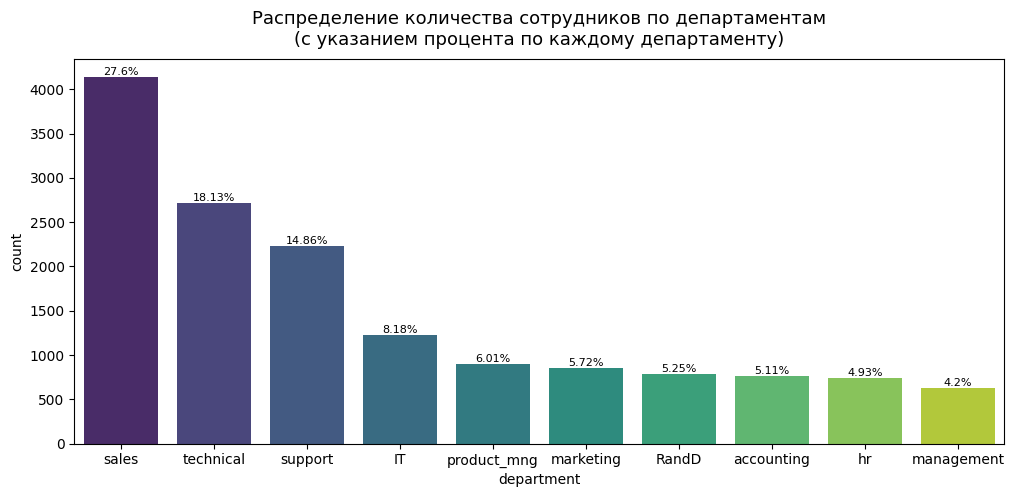

In [520]:
# Визуализируем процентное распределение сотрудников в разрезе департаментов:

plt.figure(figsize=(12, 5))

countplot = sns.countplot(x='department',
                          hue='department',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=df_hr['department'].value_counts().index,
                          hue_order=df_hr['department'].value_counts().index)

countplot.set_title('Распределение количества сотрудников по департаментам\n\
(с указанием процента по каждому департаменту)', \
                    fontdict={'fontsize':13}, pad=10)


# Задаем подписи (метки) данных:

data_department = df_hr.groupby('department')['salary'].\
count().sort_values(ascending=False)

for i, val in enumerate(data_department.values):
    plt.text(i,
             val,
             f"{round(val/sum(data_department.values) * 100, 2)}%",
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'size':8})

plt.show()

Итак, большинство сотрудников работает в отделе продаж (27,6%).

На втором месте - технический отдел, на который приходится 18,1% сотрудников.

На третьем месте - отдел поддержки с 14,9% сотрудников.

Таким образом, на перечисленные выше отделы приходится около 60% всего персонала.



---



## **ЗАДАНИЕ 5**

**Показать распределение сотрудников по зарплатам.**

In [ ]:
# ВАРИАНТ 1

In [ ]:
# Проще всего выявить распределение сотрудников в разрезе уровней зарплат,
# применяя метод value_counts():

df_hr['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [ ]:
# Визуализация распределения сотрудников в разрезе уровней зарплат

df_hr['salary'].value_counts().to_frame().style.bar(align='mid',
                                                    color='lightseagreen')

,count
salary,
low,7316
medium,6446
high,1237


In [ ]:
df_hr['salary'].value_counts(normalize=True)

salary
low       0.487766
medium    0.429762
high      0.082472
Name: proportion, dtype: float64

In [ ]:
# ВАРИАНТ 2

In [ ]:
# С применением группировки и сортировки по убыванию

In [ ]:
df_hr.groupby(['salary']).agg('count')['satisfaction_level'].\
sort_values(ascending=False)

salary
low       7316
medium    6446
high      1237
Name: satisfaction_level, dtype: int64

In [ ]:
# ВАРИАНТ 3

In [ ]:
# С применением группировки, метода size() и сортировки по убыванию

In [ ]:
df_hr.groupby(['salary']).size().sort_values(ascending=False)

salary
low       7316
medium    6446
high      1237
dtype: int64

In [ ]:
# ----------------------------------------------

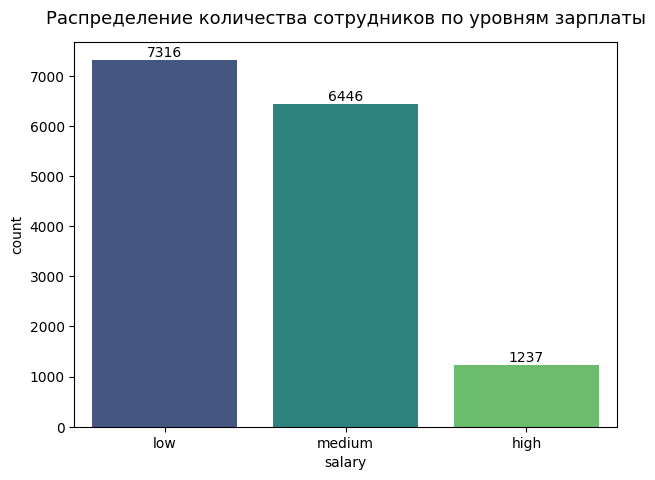

In [ ]:
# Визуализируем распределение количества сотрудников в разрезе уровней зарплаты:

plt.figure(figsize=(7, 5))

countplot = sns.countplot(x='salary',
                          hue='salary',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=df_hr['salary'].value_counts().index,
                          hue_order=df_hr['salary'].value_counts().index)

countplot.set_title('Распределение количества сотрудников по уровням зарплаты',\
                    fontdict={'fontsize':13}, pad=13)


# Задаем подписи (метки) данных:

data_salary = df_hr.groupby('salary')['department'].count().\
sort_values(ascending=False)
for i, val in enumerate(data_salary.values):
    plt.text(i,
             val,
             int(val),
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'size':10})

plt.show()

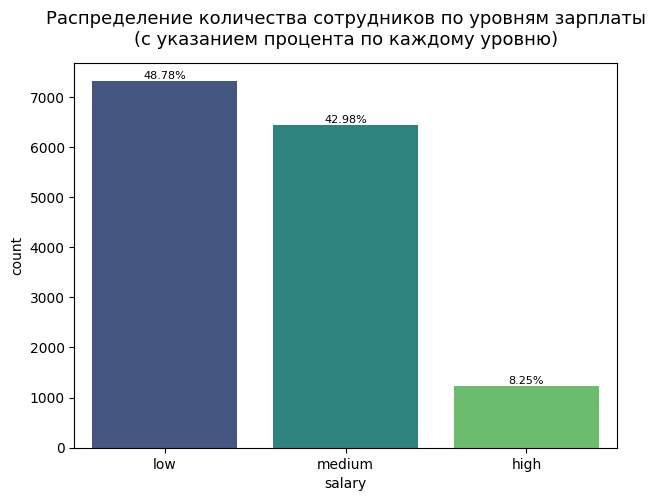

In [521]:
# Визуализируем процентное распределение сотрудников в разрезе уровней зарплаты:

plt.figure(figsize=(7, 5))

countplot = sns.countplot(x='salary',
                          hue='salary',
                          palette='viridis',
                          data=df_hr,
                          order=df_hr['salary'].value_counts().index,
                          hue_order=df_hr['salary'].value_counts().index)

countplot.set_title('Распределение количества сотрудников по уровням зарплаты\n\
(с указанием процента по каждому уровню)',\
                    fontdict={'fontsize':13}, pad=13)


# Задаем подписи (метки) данных:

data_salary = df_hr.groupby('salary')['department'].count().\
sort_values(ascending=False)
for i, val in enumerate(data_salary.values):
    plt.text(i,
             val,
             f"{round(val/sum(data_salary.values) * 100, 2)}%",
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'size':8})

plt.show()

Можно видеть, что в целом, рассматривая всех сотрудников, преобладает группа с низким уровнем зарплаты - это около половины всех сотрудников (48,8%, 7316 человек). Однако группа со средним уровнем зарплаты сопоставима по численности (43%, 6446 человек). Группа сотрудников с высоким уровнем зарплаты ожидаемо заметно меньше (8,3%, 1237 человек).


---



## **ЗАДАНИЕ 6**

**Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.**

In [ ]:
# С применением группировки

In [ ]:
df_hr_dep_salary = df_hr.groupby(['department', 'salary']).\
count()[['satisfaction_level']]

df_hr_dep_salary.columns=['count']

df_hr_dep_salary

count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

In [ ]:
# Однако видим следующее - порядок категорий сортируется в алфавитном порядке,
# что противоречит логике (сейчас - 'high', 'low', 'medium').
# Было бы лучше скорректировать порядок категорий на 'low','medium','high',
# что сделало бы восприятие более удобным.
# Можно скорректировать данный порядок принудительно, тем более что на более
# ранних этапах переменной salary был назначен категориальный тип данных
# (что является еще одним аргументом в пользу преобразования данного признака
# в категориальный тип данных - это дает возможность в дальнейшем применять
# специальные методы).

In [ ]:
# Если мы хотим изменить порядок для переменной salary,
# то нам нужно определить настраиваемый CategoricalDtype:

from pandas.api.types import CategoricalDtype

cats_to_order = ['low','medium','high'] # требуемый порядок категорий

covered_type = CategoricalDtype(categories=cats_to_order,
                                ordered=True) # учитывать порядок категорий
covered_type

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

In [ ]:
# Проведем группировку заново. Но на этот раз заранее произведем
# манипуляцию с заменой порядка следования категорий:

df_hr['salary'] = df_hr['salary'].cat.reorder_categories\
(cats_to_order, ordered=True)

df_hr_dep_salary = df_hr.groupby(['department', 'salary']).\
count()[['satisfaction_level']]

df_hr_dep_salary.columns = ['count']

df_hr_dep_salary

count
department  salary       
IT          low       609
            medium    535
            high       83
RandD       low       364
            medium    372
            high       51
accounting  low       358
            medium    335
            high       74
hr          low       335
            medium    359
            high       45
management  low       180
            medium    225
            high      225
marketing   low       402
            medium    376
            high       80
product_mng low       451
            medium    383
            high       68
sales       low      2099
            medium   1772
            high      269
support     low      1146
            medium    942
            high      141
technical   low      1372
            medium   1147
            high      201

In [ ]:
# Можно также дополнительно произвести сортировку по убыванию по полю
# с количеством сотрудников, чтобы выявить подгруппы, представленные
# наибольшим числом сотрудников:

df_hr_dep_salary_sorted = df_hr_dep_salary.sort_values(by='count',
                                                       ascending=False)

df_hr_dep_salary_sorted

count
department  salary       
sales       low      2099
            medium   1772
technical   low      1372
            medium   1147
support     low      1146
            medium    942
IT          low       609
            medium    535
product_mng low       451
marketing   low       402
product_mng medium    383
marketing   medium    376
RandD       medium    372
            low       364
hr          medium    359
accounting  low       358
            medium    335
hr          low       335
sales       high      269
management  medium    225
            high      225
technical   high      201
management  low       180
support     high      141
IT          high       83
marketing   high       80
accounting  high       74
product_mng high       68
RandD       high       51
hr          high       45

In [ ]:
# Визуализация распределения сотрудников по зарплатам
# в каждом департаменте по отдельности (c сортировкой по убыванию по полю
# с количеством сотрудников)

df_hr_dep_salary_sorted.style.bar(align='mid',
                                  color='lightseagreen')

Так, наиболее многочисленна подгруппа сотрудников из отдела продаж с низким уровнем зарплаты (2099 человек). На втором месте по числу сотрудников - подгруппа из отдела продаж со средним уровнем зарплаты (1772 человека). На третьем месте по числу сотрудников - подгруппа из технического отдела с низким уровнем зарплаты (1372 человека).

В целом можно увидеть, что наиболее многочисленны сотрудники отдела продаж, технического отдела, отдела поддержки и отдела ИТ с низким и средним уровнями зарплаты.

Подгруппы из различных отделов с высоким уровнем зарплаты характеризуются наименьшим числом сотрудников.

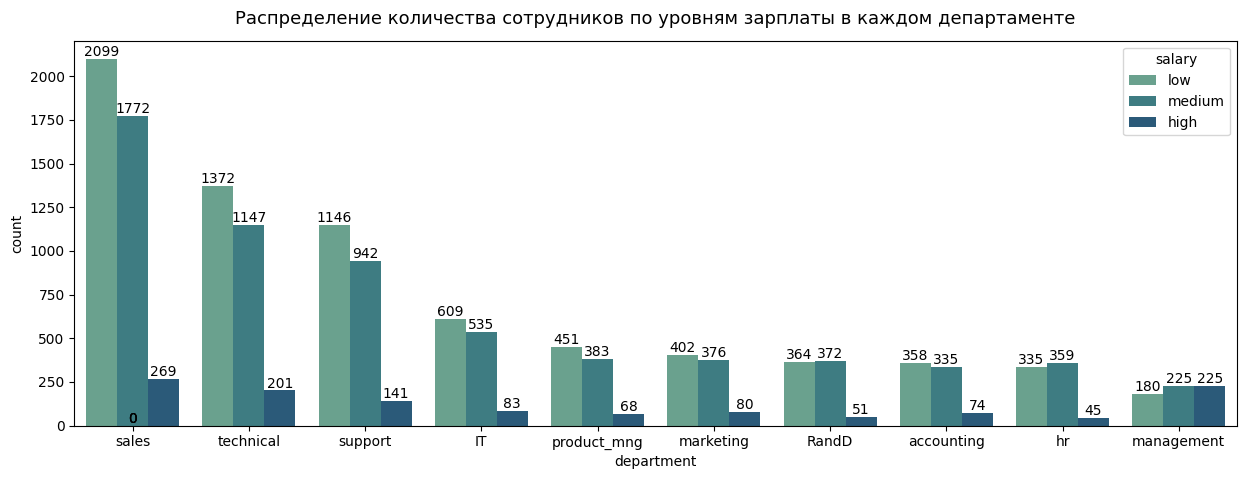

In [ ]:
# Визуализируем распределение количества сотрудников в разрезе уровней зарплаты
# в каждом департаменте:

plt.figure(figsize=(15, 5))

countplot = sns.countplot(x='department',
                          hue='salary',
                          palette='crest',
                          data=df_hr,
                          order=df_hr['department'].value_counts().index)

# Метки данных:
for i, bar in enumerate(countplot.patches):
    count = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height() + 0.1  # Смещение вверх
    countplot.annotate(f"{count:.0f}",
                       xy=(x, y),
                       ha='center',
                       va='bottom')

countplot.set_title('Распределение количества сотрудников по уровням зарплаты \
в каждом департаменте', fontdict={'fontsize':13}, pad=12)

plt.show()

Таким образом, видим, что для большинства отделов характерен тот паттерн, который был выявлен на предыдущем шаге при рассмотрении распределения по уровням зарплаты всех сотрудников в целом - т.е. преобладает подгруппа с низким уровнем зарплаты, далее по численности следует группа со средним уровнем зарплаты, но разница между этими двумя группами относительно не столь велика. Только для двух отделов эта закономерность иная: а именно для отдела исследований и развития R&D и отдела HR, здесь подгруппа со средним уровнем зарплаты незначительно, но преобладает.

А вот совсем иное положение дел для подразделения менеджмента, что представляется закономерным для управленческого звена (при этом само подразделение наименьшее по количеству сотрудников): подгруппа с низким уровнем зарплаты самая малочисленная, далее следуют подгруппы со средним и высоким уровнями зарплаты, которые равны по численности.



---



## **ЗАДАНИЕ 7**

**Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.**

In [ ]:
# Отфильтруем из основного датафрейма данные о среднем количестве часов
# на рабочем месте в месяц по сотрудникам с низким уровнем зарплаты:

df_hr_low_salary_hours = df_hr[df_hr['salary'] == 'low']\
[['average_monthly_hours']]

df_hr_low_salary_hours.columns = ['low_salary_hours']

df_hr_low_salary_hours

,low_salary_hours
0,157
3,223
4,159
5,153
6,247
...,...
14994,151
14995,160
14996,143
14997,280


In [ ]:
# Отфильтруем из основного датафрейма данные о среднем количестве часов
# на рабочем месте в месяц по сотрудникам с высоким уровнем зарплаты:

df_hr_high_salary_hours = df_hr[df_hr['salary'] == 'high']\
[['average_monthly_hours']]

df_hr_high_salary_hours.columns = ['high_salary_hours']

df_hr_high_salary_hours

,high_salary_hours
72,149
111,289
189,156
267,129
306,149
...,...
14829,148
14868,130
14902,159
14941,131


In [ ]:
# Объединим полученные на предыдущих шагах датафреймы,
# содержащие данные о среднем количестве часов на рабочем месте в месяц
# по сотрудникам с низким уровнем зарплаты, а также по сотрудникам
# с высоким уровнем зарплаты:

df_hr_low_high_salary_hours = pd.concat\
([df_hr_low_salary_hours, df_hr_high_salary_hours], axis=1)

df_hr_low_high_salary_hours

,low_salary_hours,high_salary_hours
0,157.0,NaN
3,223.0,NaN
4,159.0,NaN
5,153.0,NaN
6,247.0,NaN
...,...,...
14829,NaN,148.0
14868,NaN,130.0
14902,NaN,159.0
14941,NaN,131.0


In [ ]:
# Можно получить по объединенному на предыдущем шаге датафрейму
# основные показатели описательной статистики:

df_hr_low_high_salary_hours.describe()

,low_salary_hours,high_salary_hours
count,7316.000000,1237.000000
mean,200.996583,199.867421
std,50.832214,47.710446
min,96.000000,96.000000
25%,155.000000,161.000000
50%,199.000000,199.000000
75%,246.000000,241.000000
max,310.000000,307.000000


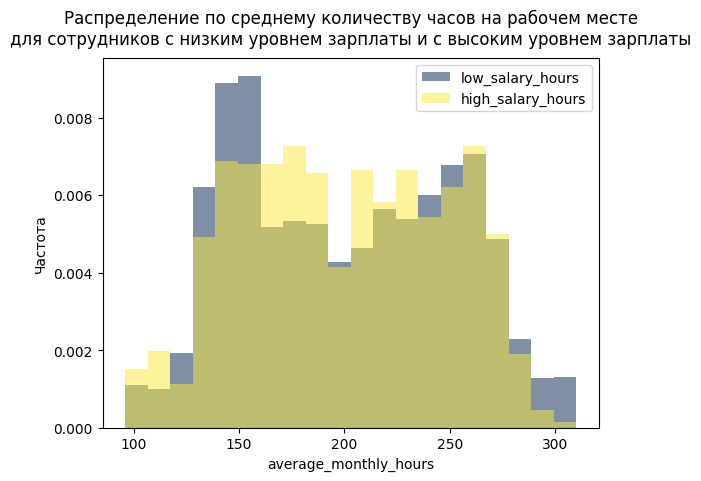

In [ ]:
# Сравнение распределений по среднему количеству часов на рабочем месте
# для сотрудников с низким уровнем зарплаты и с высоким уровнем зарплаты
# с применением визуализаций - гистограмм распределения:

cm = plt.get_cmap('cividis')

df_hr_low_high_salary_hours.plot(kind='hist',
                                 alpha=0.5,
                                 bins=20,
                                 density=True,
                                 cmap=cm)

plt.xlabel('average_monthly_hours')
plt.ylabel('Частота')

plt.title('Распределение по среднему количеству часов на рабочем месте\n\
для сотрудников с низким уровнем зарплаты и с высоким уровнем зарплаты',
fontdict={'fontsize':12}, pad=10)

plt.show()

Как видим, первично ознакомившись с показателями описательной статистики и с визуализацией распределений, между показателями среднего количества часов на рабочем месте в месяц по сотрудникам с низким уровнем зарплаты, а также по сотрудникам с высоким уровнем зарплаты не наблюдается заметных различий.

Так, показатели среднего значения и медианы в обоих случаях практически идентичны. И даже показатели минимального и максимального значения очень близки. Среднеквадратические отклонения также не имеют значительного различия. Визуализация распределений также позволяет увидеть, что нет значимого различия между временем, проводимым на работе сотрудниками с низким уровнем зарплаты и сотрудниками с высоким уровнем зарплаты.

In [ ]:
# ----------------------------------------------

In [ ]:
# Проведем СТАТИСТИЧЕСКУЮ ПРОВЕРКУ ГИПОТЕЗЫ

In [ ]:
from scipy import stats

# Проверим гипотезу с помощью scipy.stats.ttest_ind (T-test),
# так как с его помощью можно сравнить средние двух совокупностей:

result = stats.ttest_ind(a=df_hr_low_salary_hours,
                         b=df_hr_high_salary_hours,
                         equal_var=False)
print(result)

alpha=0.001 # выбор такого уровня alpha обусловлен размером выборки
            # (превышает несколько тысяч наблюдений)

# Нулевая гипотеза заключается в предположении о равенстве времени
# для сотрудников с низким окладом и для сотрудников с высоким окладом:
if (result.pvalue < alpha):
    print('\nОтвергается нулевая гипотеза, следовательно время на работе \
для сотрудников с низким окладом и для сотрудников с высоким окладом \
НЕ является равным.')
else:
    print('\nНЕ отвергается нулевая гипотеза, следовательно время на работе \
для сотрудников с низким окладом и для сотрудников с высоким окладом \
равно.')

TtestResult(statistic=array([0.76243317]), pvalue=array([0.44590455]), df=array([1745.12480363]))

НЕ отвергается нулевая гипотеза, следовательно время на работе для сотрудников с низким окладом и для сотрудников с высоким окладом равно.


Таким образом, результаты статистической проверки гипотезы соответствуют сделанным ранее выводам по сопоставлению показателей описательной статистики и визуализаций распределений: нет значимого различия между временем, проводимым на работе сотрудниками с низким уровнем зарплаты и сотрудниками с высоким уровнем зарплаты.



---



## **ЗАДАНИЕ 8**

**Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):**

<br>

● **Доля сотрудников с повышением за последние 5 лет.**

● **Средняя степень удовлетворенности.**

● **Среднее количество проектов.**

In [ ]:
# Рассчет ДОЛИ СОТРУДНИКОВ С ПОВЫШЕНИЕМ ЗА ПОСЛЕДНИЕ 5 ЛЕТ

In [ ]:
# Сначала рассмотрим распределение численности сотрудников
# с повышением за последние 5 лет в разрезе уволившихся и не уволившихся.
# Используется агрегация sum, т.к. в датафрейме df_hr
# переменная promotion_last_5years как раз представлена 0 и 1,
# т.е. целочисленным типом данных, и сумма как раз позволит
# агрегировать тех сотрудников, у которых было повышение
# за последние 5 лет.
# А агрегация count показывает общее число сотрудников в разрезе
# уволившихся и не уволившихся.

df_hr_left_or_not_promotion = df_hr.groupby('left')[['promotion_last_5years']].\
agg(['count', 'sum'])


df_hr_left_or_not_promotion.rename(columns = {'count': 'Общее число',\
                        'sum': 'Число с повышением за посл. 5 лет'}, \
                         inplace=True)

df_hr_left_or_not_promotion = df_hr_left_or_not_promotion.stack(level=0)

df_hr_left_or_not_promotion

,,Общее число,Число с повышением за посл. 5 лет
left,,,
0,promotion_last_5years,11428,300
1,promotion_last_5years,3571,19


In [ ]:
# Расчет долей сотрудников с повышением за последние 5 лет
# в разрезе уволившихся и не уволившихся

df_hr_left_or_not_promotion['promotion_share_1'] = \
round(df_hr_left_or_not_promotion['Число с повышением за посл. 5 лет']\
      /df_hr_left_or_not_promotion['Общее число'], 3)

df_hr_left_or_not_promotion

,,Общее число,Число с повышением за посл. 5 лет,promotion_share_1
left,,,,
0,promotion_last_5years,11428,300,0.026
1,promotion_last_5years,3571,19,0.005


Итак, от общего числа тех, кто не уволился, 2,6% получили повышение за последние 5 лет.
А от общего числа тех, кто уволился, только 0,5% получили повышение за последние 5 лет, что видится закономерным, т.к. они покинули компанию, и располагали меньшим горизонтом времени, чтобы успеть получить повышение.
Однако можно также выдвинуть предположение, что те, кто уволился из компании, имели меньше предпосылок к получению повышения.

In [ ]:
# Если интерпретировать вопрос о доле сотрудников с повышением
# за последние 5 лет среди уволившихся и не уволившихся сотрудников
# (по отдельности) другим образом, т.е. исходя из того, что
# ищем какая доля из тех, кто получил повышение за последние 5 лет,
# приходится на уволившихся, а какая доля - на не уволившихся,
# то результат будет следующим:

df_hr_left_or_not_promotion_2 = df_hr.groupby('left')[['promotion_last_5years']].\
agg('sum').assign(promotion_share_2 = lambda x: round(x / x.sum(), 3))

df_hr_left_or_not_promotion_2

,promotion_last_5years,promotion_share_2
left,,
0,300,0.94
1,19,0.06


Следовательно, подавляющее большинство (94%) из тех, кто получил повышение за последние 5 лет, приходится на тех, кто не уволнялся из компании, что логически представляется верным.

In [ ]:
# ----------------------------------------------

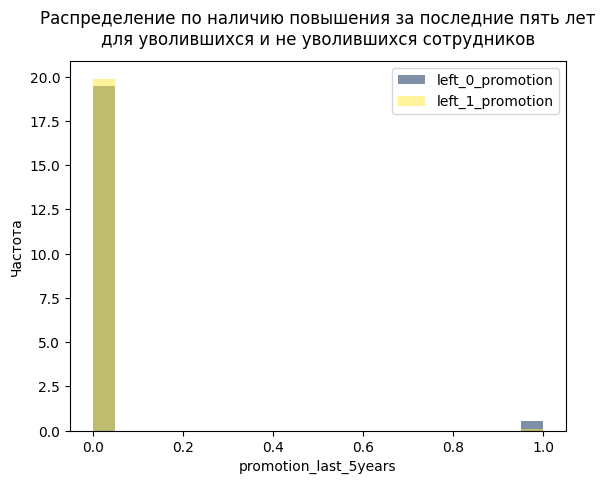

In [ ]:
# Можно также произвести сравнение распределений по наличию повышения\
# за последние пять лет для уволившихся и не уволившихся сотрудников
# с применением визуализаций - гистограмм распределения:

df_hr_left_or_not_promotion_for_viz = pd.concat\
([df_hr[df_hr['left'] == 0][['promotion_last_5years']], \
  df_hr[df_hr['left'] == 1][['promotion_last_5years']]], axis=1)

df_hr_left_or_not_promotion_for_viz.columns = \
['left_0_promotion', 'left_1_promotion']

# Сравнение распределений:

cm = plt.get_cmap('cividis')

df_hr_left_or_not_promotion_for_viz.plot(kind='hist',
                                         alpha=0.5,
                                         bins=20,
                                         density=True,
                                         cmap=cm)

plt.xlabel('promotion_last_5years')
plt.ylabel('Частота')

plt.title('Распределение по наличию повышения за последние пять лет\n\
для уволившихся и не уволившихся сотрудников',
fontdict={'fontsize':12}, pad=12)

plt.show()

Видим подтверждение для предшествовавших выводов: среди тех, кто получил повышение за последние 5 лет, практически не видны те, кто уволился.

In [ ]:
# ----------------------------------------------

In [ ]:
# Рассчет СРЕДНЕЙ СТЕПЕНИ УДОВЛЕТВОРЕННОСТИ

In [ ]:
# С применением группировки и агрегации mean(), которая позволит получить
# средний показатель по уровню удовлетворенности в разрезе уволившихся
# и не уволившихся:

df_hr_left_or_not_satisfaction = df_hr.groupby('left')[['satisfaction_level']].\
mean()

df_hr_left_or_not_satisfaction

,satisfaction_level
left,
0,0.666810
1,0.440098


Видим, что степень удовлетворенности тех, кто не уволнялся (0.667), заметно выше степени удовлетворенности среди уволившихся (0.44), что закономерно.

Вспомним, что среднее значение степени удовлетворенности среди всех сотрудников в целом составляло 0.613, что сопоставимо с показателем среди не увольнявшихся.	Однако среди уволившихся данный показатель ощутимо ниже среднего по всем сотрудникам.

Также можно вспомнить, что в результате анализа корреляционной матрицы было выявлено, что показатель корреляции для пары признаков left - satisfaction_level составлял -0.3884 (обратная корреляция, что подтверждается и по результатам рассчетов) - этот показатель был на втором месте (среди всех пар признаков) по силе связи между переменными.

In [ ]:
# ----------------------------------------------

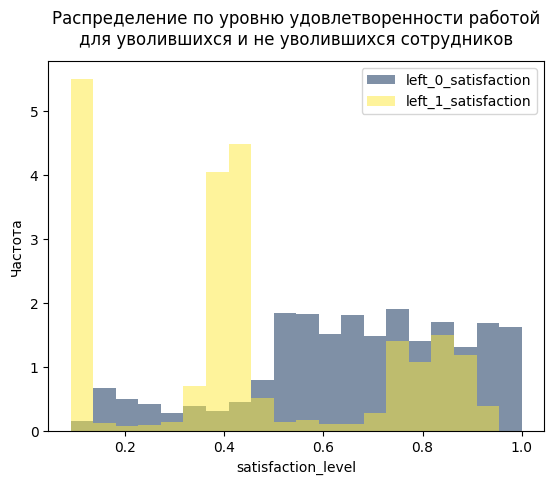

In [ ]:
# Можно также произвести сравнение распределений по уровню удовлетворенности
# работой для уволившихся и не уволившихся сотрудников
# с применением визуализаций - гистограмм распределения:

df_hr_left_or_not_satisfaction_for_viz = pd.concat\
([df_hr[df_hr['left'] == 0][['satisfaction_level']], \
  df_hr[df_hr['left'] == 1][['satisfaction_level']]], axis=1)

df_hr_left_or_not_satisfaction_for_viz.columns = \
['left_0_satisfaction', 'left_1_satisfaction']

# Сравнение распределений:

cm = plt.get_cmap('cividis')

df_hr_left_or_not_satisfaction_for_viz.plot(kind='hist',
                                            alpha=0.5,
                                            bins=20,
                                            density=True,
                                            cmap=cm)

plt.xlabel('satisfaction_level')
plt.ylabel('Частота')

plt.title('Распределение по уровню удовлетворенности работой\n\
для уволившихся и не уволившихся сотрудников',
fontdict = {'fontsize':12}, pad=12)

plt.show()

Интересно заметить, как различаются распределения по уровню удовлетворенности работой для уволившихся и не уволившихся сотрудников. Для не увольнявшихся сотрудников распределение смещено вправо, т.е. уровень удовлетворенности в целом заметно выше. В то время как для увольнявшихся сотрудников распределение смещается влево, что свидетельствует о заметно более низком уровне удовлетворенности работой.

При этом интересно также отметить, что выделяется высокой частотой группа показателей удовлетворенности с самыми низкими значениями (самый высокий столбец в левой части диаграммы). Но есть среди уволившихся и те, кто оценивал степень удовлетворенности высоко (оценки в правой части распределения для уволившихся).

In [ ]:
# ----------------------------------------------

In [ ]:
# Рассчет СРЕДНЕГО КОЛИЧЕСТВА ПРОЕКТОВ

In [ ]:
# С применением группировки и агрегации mean(), которая позволит получить
# средний показатель по уровню удовлетворенности в разрезе уволившихся
# и не уволившихся:

df_hr_left_or_not_projects = df_hr.groupby('left')[['number_project']].mean()

df_hr_left_or_not_projects

,number_project
left,
0,3.786664
1,3.855503


Как можно увидеть, среднее количество проектов, выполненных за время работы, для уволившихся (3.9) и для не уволившихся сотрудников (3.8) почти одинаково. Оба этих показателя на уровне среднего количества проектов по всем сотрудникам компании в целом (вспомним, что он составлял 3.8).

In [ ]:
# ----------------------------------------------

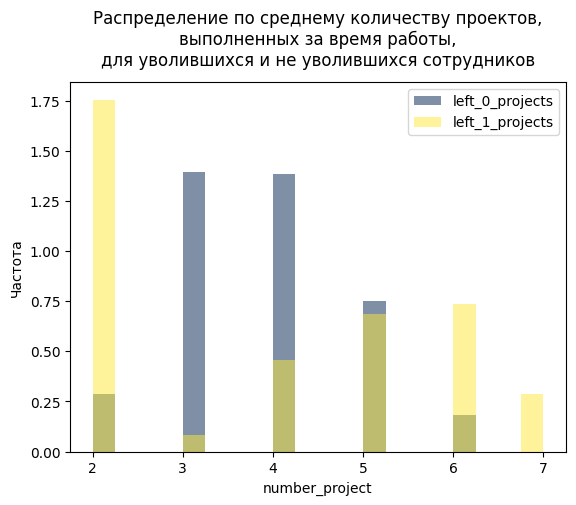

In [ ]:
# Можно также произвести сравнение распределений
# по среднему количеству проектов, выполненных за время работы,
# для уволившихся и не уволившихся сотрудников
# с применением визуализаций - гистограмм распределения:

df_hr_left_or_not_projects_for_viz = pd.concat\
([df_hr[df_hr['left'] == 0][['number_project']], \
  df_hr[df_hr['left'] == 1][['number_project']]], axis=1)

df_hr_left_or_not_projects_for_viz.columns = \
['left_0_projects', 'left_1_projects']

# Сравнение распределений:

cm = plt.get_cmap('cividis')

df_hr_left_or_not_projects_for_viz.plot(kind='hist',
                                        alpha=0.5,
                                        bins=20,
                                        density=True,
                                        cmap=cm)

plt.xlabel('number_project')
plt.ylabel('Частота')

plt.title('Распределение по среднему количеству проектов,\n\
выполненных за время работы,\nдля уволившихся и не уволившихся сотрудников',
fontdict={'fontsize':12}, pad=12)

plt.show()

Данная визуализация позволяет получить следующую уточняющую информацию. Среди уволившихся было значительное число тех, кто успел выполнить за время работы всего два проекта (переменная number_project представлена дискретными значениями от 2 до 7). Можно выдвинуть предположение о несправившихся с завершением более значительного объема проектов и впоследствии уволившихся.

Но заметно, что среди уволившихся были и те, кто выполнил максимально высокие количества проектов (6 и 7), при этом среди не уволившихся вообще нет тех, кто выполнил 7 проектов и заметно меньше тех, кто успел выполнить 6 проектов. Т.е. здесь можно предполагать наличие для данного сегмента сотрудников (уволившихся) переработок (возможно, речь шла о 'профессиональном выгорании').

Среди не уволившихся значительно больше тех (по сравнению с уволившимися), кто завершил в среднем 3-5 проектов, т.е. можно предположить, что они нашли некий баланс в рабочей нагрузке, и потому их деятельность не повлекла последующего увольнения.

In [ ]:
# ----------------------------------------------

In [ ]:
# СБОР ВЫЧИСЛЕННЫХ ПОКАЗАТЕЛЕЙ в единый датафрейм

In [ ]:
df_hr_left_or_not_common = pd.concat\
([df_hr_left_or_not_promotion.reset_index()['promotion_share_1'], \
  df_hr_left_or_not_satisfaction['satisfaction_level'], \
  df_hr_left_or_not_projects['number_project']], axis=1)

df_hr_left_or_not_common.columns = \
['promotion_share', 'mean_satisfaction_level', 'mean_number_project']

df_hr_left_or_not_common.index.name = 'left_or_not'

df_hr_left_or_not_common

,promotion_share,mean_satisfaction_level,mean_number_project
left_or_not,,,
0,0.026,0.666810,3.786664
1,0.005,0.440098,3.855503


In [ ]:
# ----------------------------------------------

In [ ]:
# ДОПОЛНИТЕЛЬНО

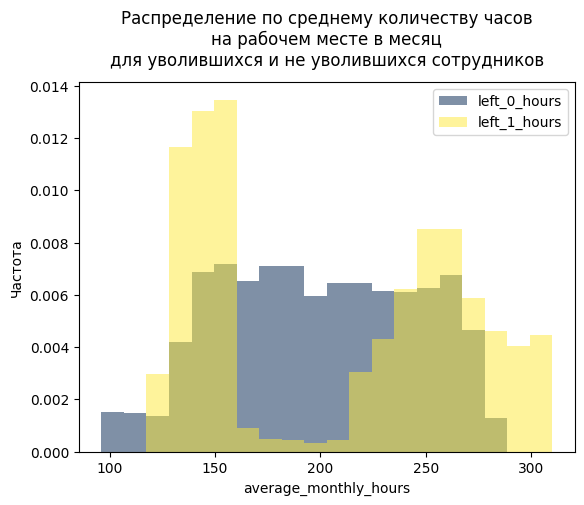

In [ ]:
# Интересно также теперь дополнительно посмотреть сравнение распределений
# по среднему количеству часов на рабочем месте в месяц
# для уволившихся и не уволившихся сотрудников
# с применением визуализаций - гистограмм распределения:

df_hr_left_or_not_hours_for_viz = pd.concat\
([df_hr[df_hr['left'] == 0][['average_monthly_hours']], \
  df_hr[df_hr['left'] == 1][['average_monthly_hours']]], axis=1)

df_hr_left_or_not_hours_for_viz.columns = \
['left_0_hours', 'left_1_hours']

# Сравнение распределений:

cm = plt.get_cmap('cividis')

df_hr_left_or_not_hours_for_viz.plot(kind='hist',
                                     alpha=0.5,
                                     bins=20,
                                     density=True,
                                     cmap=cm)

plt.xlabel('average_monthly_hours')
plt.ylabel('Частота')

plt.title('Распределение по среднему количеству часов\nна рабочем месте в месяц\
\nдля уволившихся и не уволившихся сотрудников',
fontdict={'fontsize':12}, pad=12)

plt.show()

Интересно увидеть подтверждение тем выводам, которые были сделаны при сравнении распределений по среднему количеству проектов, выполненных за время работы, для уволившихся и не уволившихся сотрудников. Снова видим ту же ситуацию: среди уволившихся выделяются те, кто работал в течение месяца относительно мало. А также выделяются те, кто работал в течение месяца относительно много, и даже больше тех, кто остался в компании. Т.е. опять видим ситуацию с наличием переработок у части уволившихся сотрудников.

In [ ]:
# ----------------------------------------------

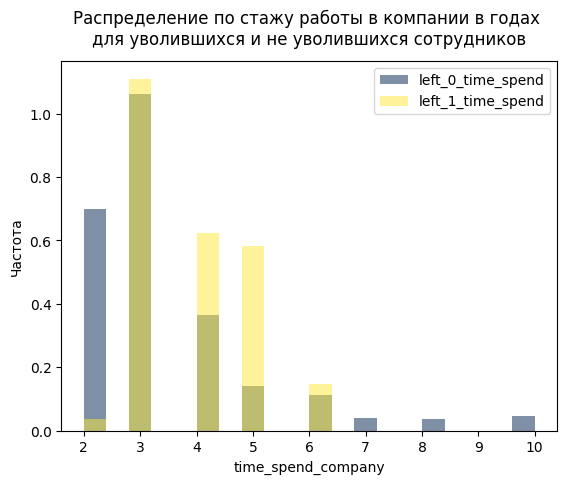

In [ ]:
# Интересно также теперь дополнительно посмотреть сравнение распределений
# по стажу работы в компании в годах
# для уволившихся и не уволившихся сотрудников
# с применением визуализаций - гистограмм распределения:

df_hr_left_or_not_time_spend_for_viz = pd.concat\
([df_hr[df_hr['left'] == 0][['time_spend_company']], \
  df_hr[df_hr['left'] == 1][['time_spend_company']]], axis=1)

df_hr_left_or_not_time_spend_for_viz.columns = \
['left_0_time_spend', 'left_1_time_spend']

# Сравнение распределений:

cm = plt.get_cmap('cividis')

df_hr_left_or_not_time_spend_for_viz.plot(kind='hist',
                                          alpha=0.5,
                                          bins=20,
                                          density=True,
                                          cmap=cm)

plt.xlabel('time_spend_company')
plt.ylabel('Частота')

plt.title('Распределение по стажу работы в компании в годах \
\nдля уволившихся и не уволившихся сотрудников',
fontdict={'fontsize':12}, pad=12)

plt.show()

Визуализация позволяет увидеть следующее дополнение: среди покинувших компанию нет 'старожилов', проработавших более 6 лет. Те, кто обладает относительно большим стажем (более 6 лет), уже не увольнялись из компании (т.е. можно считать таких стабильных сотрудников 'закрепившимися' на данном месте работы).

In [ ]:
# ----------------------------------------------

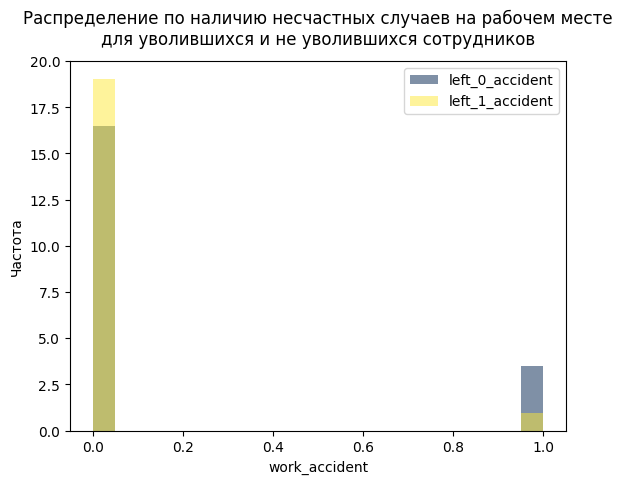

In [ ]:
# Можно также теперь дополнительно произвести сравнение распределений \
# по наличию несчастных случаев на рабочем месте \
# для уволившихся и не уволившихся сотрудников
# с применением визуализаций - гистограмм распределения:

df_hr_left_or_not_accident_for_viz = pd.concat\
([df_hr[df_hr['left'] == 0][['work_accident']], \
  df_hr[df_hr['left'] == 1][['work_accident']]], axis=1)

df_hr_left_or_not_accident_for_viz.columns = \
['left_0_accident', 'left_1_accident']

# Сравнение распределений:

cm = plt.get_cmap('cividis')

df_hr_left_or_not_accident_for_viz.plot(kind='hist',
                                        alpha=0.5,
                                        bins=20,
                                        density=True,
                                        cmap=cm)

plt.xlabel('work_accident')
plt.ylabel('Частота')

plt.title('Распределение по наличию несчастных случаев на рабочем месте\n\
для уволившихся и не уволившихся сотрудников',
fontdict={'fontsize':12}, pad=12)

plt.show()

Можно видеть, что тот фактор, происходили ли с сотрудником на рабочем месте несчастные случаи, нельзя назвать значимо влияющим на последующее увольнение сотрудника. Так, среди тех, с кем произошел несчастный случай, сравнительно меньше тех, кто впоследствии уволился (по сравнению с теми, кто не уволился).

In [ ]:
# ----------------------------------------------

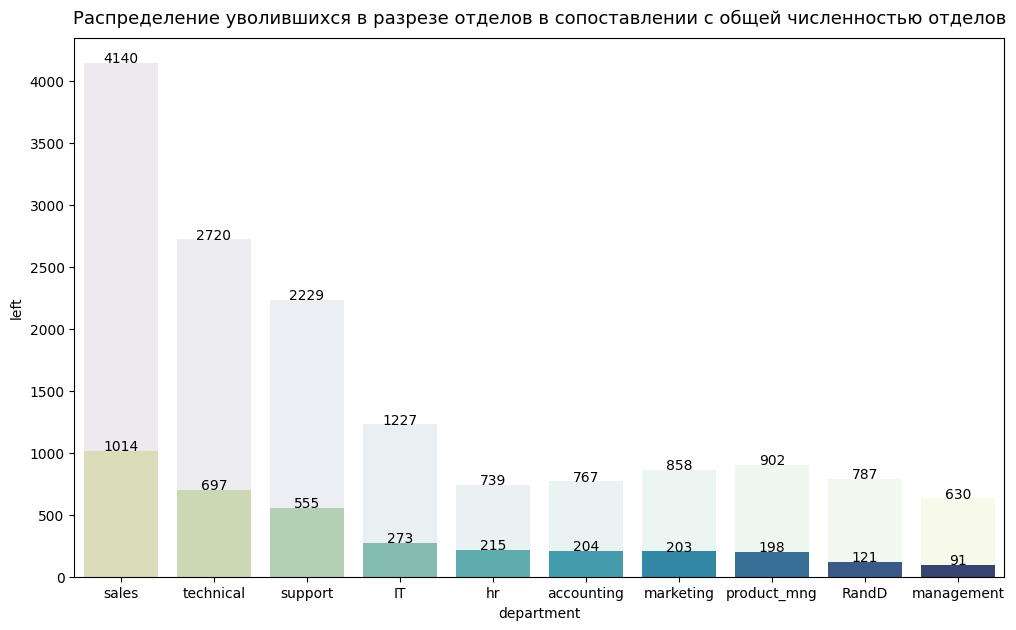

In [509]:
# Можно также теперь дополнительно рассмотреть распределение уволившихся
# в разрезе отделов с применением визуализации:

plt.figure(figsize=(12, 7))

data_left_department = df_hr[df_hr['left'] == 1].groupby(['department']).\
count()['left'].sort_values(ascending=False)

barplot = sns.barplot(data=df_hr,
                      x='department',
                      y='left',
                      hue='department',
                      legend=False,
                      estimator=np.sum,
                      order=data_left_department.index,
                      hue_order=data_left_department.index,
                      errorbar=None,
                      palette='YlGnBu')

barplot.set_title('Распределение уволившихся в разрезе отделов в сопоставлении\
 с общей численностью отделов',
                  fontdict={'fontsize':13}, pad=10)

countplot = sns.countplot(x='department',
                          hue='department',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=data_left_department.index,
                          hue_order=data_left_department.index,
                          alpha=0.1)

# Метки данных:
for i, p in enumerate(countplot.patches):
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    f"{int(height):.0f}",
                    ha="center")

plt.show()

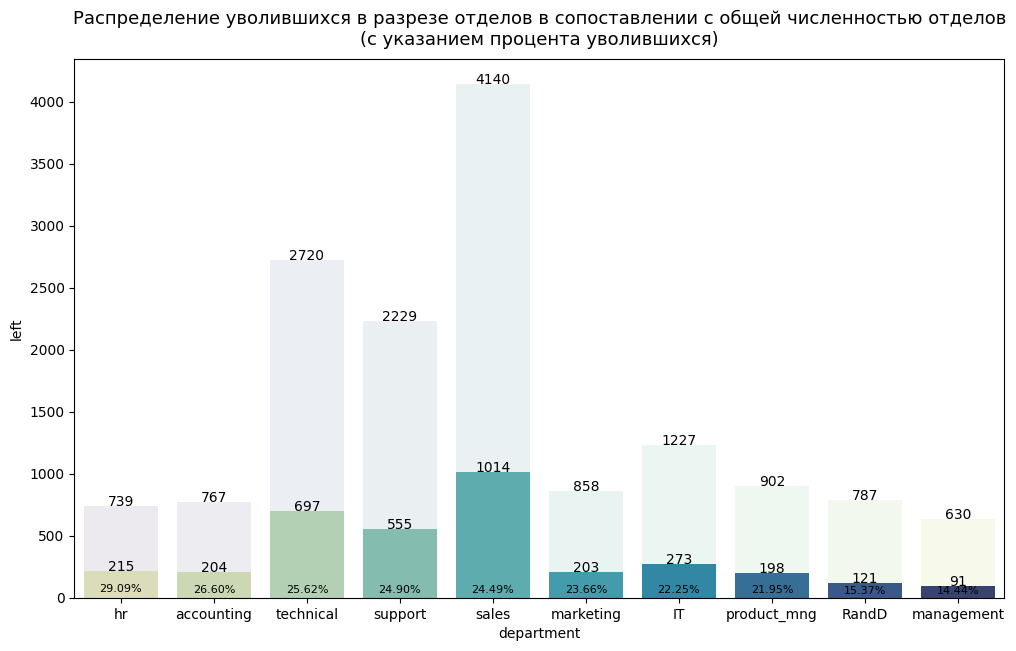

In [510]:
# Можно также теперь дополнительно рассмотреть процент уволившихся
# от общей численности сотрудников данного отдела:

plt.figure(figsize=(12, 7))

data_left_department = df_hr[df_hr['left'] == 1].groupby(['department']).\
count()['left']

data_left_department_percent = round(df_hr[df_hr['left'] == 1].\
                                     groupby(['department']).count()['left']\
                                     /df_hr.groupby(['department']).\
                                     count()['left'] * 100, 2).\
                                     sort_values(ascending=False)

barplot = sns.barplot(data=df_hr,
                      x='department',
                      y='left',
                      hue='department',
                      legend=False,
                      estimator=np.sum,
                      order=data_left_department_percent.index,
                      hue_order=data_left_department_percent.index,
                      errorbar=None,
                      palette='YlGnBu')

barplot.set_title('Распределение уволившихся в разрезе отделов в сопоставлении\
 с общей численностью отделов\n(с указанием процента уволившихся)',
                  fontdict={'fontsize':13}, pad=10)


for i, val in enumerate(data_left_department_percent.values):
    plt.text(i,
             val,
             f"{val:.2f}%",
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'size':8})

countplot = sns.countplot(x='department',
                          hue='department',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=data_left_department_percent.index,
                          hue_order=data_left_department_percent.index,
                          alpha=0.1)

# Метки данных:
for i, p in enumerate(countplot.patches):
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    f"{int(height):.0f}",
                    ha="center")


plt.show()

Как видим, в целом распределение уволившихся в разрезе отделов соотносится с численностью сотрудников по отделам. Однако выделяются отдел hr и accounting - доля уволившихся относительно численности отдела в них повыше. Меньше всего доля уволившихся среди менеджмента (14,4%), что выглядит закономерным.

In [ ]:
# ----------------------------------------------

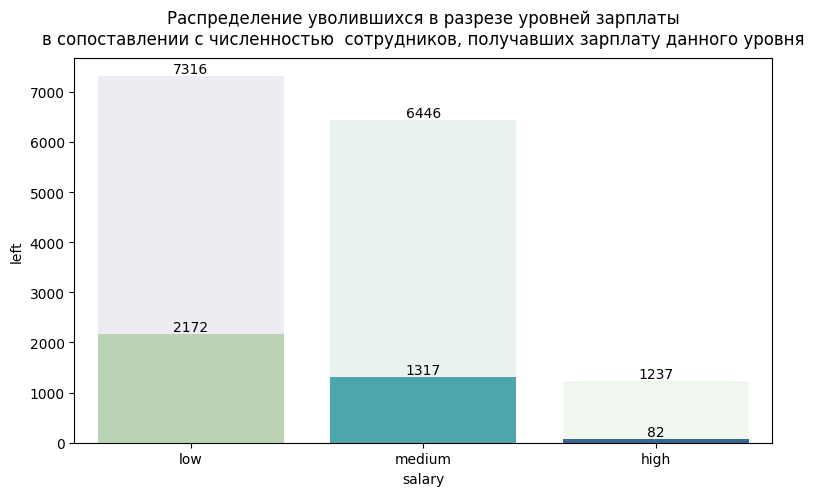

In [ ]:
# Можно также теперь дополнительно рассмотреть распределение уволившихся
# в разрезе уровней зарплаты с применением визуализации:

plt.figure(figsize=(9, 5))

data_left_salary = df_hr[df_hr['left'] == 1].groupby(['salary']).\
count()['left'].sort_values(ascending = False)

barplot = sns.barplot(data=df_hr,
                      x='salary',
                      y='left',
                      hue='salary',
                      legend=False,
                      estimator=np.sum,
                      order=data_left_salary.index,
                      hue_order=data_left_salary.index,
                      errorbar=None,
                      palette='YlGnBu')

barplot.set_title('Распределение уволившихся в разрезе уровней зарплаты\n\
в сопоставлении с численностью  сотрудников, получавших зарплату данного уровня', \
                    fontdict={'fontsize':12}, pad=10)

for i, val in enumerate(data_left_salary.values):
    plt.text(i,
             val,
             val,
             horizontalalignment='center',
             verticalalignment='bottom',
             fontdict={'size':10})

countplot = sns.countplot(x='salary',
                          hue='salary',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=data_left_salary.index,
                          hue_order=data_left_salary.index,
                          alpha=0.1)

data_salary = df_hr.groupby('salary')['department'].\
count().sort_values(ascending = False)

for i, val in enumerate(data_salary.values):
    countplot.text(i,
                   val,
                   int(val),
                   horizontalalignment='center',
                   verticalalignment='bottom',
                   fontdict={'size':10})

plt.show()

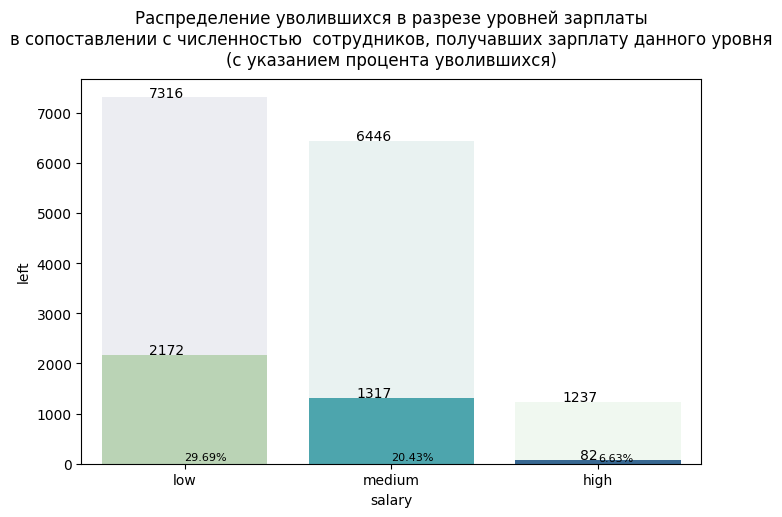

In [517]:
# Можно также теперь дополнительно рассмотреть процент уволившихся
# от общей численности сотрудников с данным уровнем зарплаты
# с применением визуализации:

plt.figure(figsize = (8, 5))

data_left_salary = df_hr[df_hr['left'] == 1].groupby(['salary']).\
count()['left'].sort_values(ascending=False)

barplot = sns.barplot(data=df_hr,
                      x='salary',
                      y='left',
                      hue='salary',
                      legend=False,
                      estimator=np.sum,
                      order=data_left_salary.index,
                      hue_order=data_left_salary.index,
                      errorbar=None,
                      palette='YlGnBu')

barplot.set_title('Распределение уволившихся в разрезе уровней зарплаты\n\
в сопоставлении с численностью  сотрудников, получавших зарплату данного уровня\n\
(с указанием процента уволившихся)',
                  fontdict={'fontsize':12}, pad=10)

data_left_salary_percent = round(df_hr[df_hr['left'] == 1].groupby(['salary']).\
count()['left']/df_hr.groupby(['salary']).count()['left'] * 100, 2)

for i, val in enumerate(data_left_salary_percent.values):
    plt.text(i,
             val,
             f"{val:.2f}%",
             horizontalalignment='left',
             verticalalignment='bottom',
             fontdict={'size':8})

countplot = sns.countplot(x='salary',
                          hue='salary',
                          legend=False,
                          palette='viridis',
                          data=df_hr,
                          order=data_left_salary.index,
                          hue_order=data_left_salary.index,
                          alpha=0.1)

# Метки данных:
for i, p in enumerate(countplot.patches):
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width() / 2.,
                    height + 3,
                    f"{int(height):.0f}",
                    ha="right")

plt.show()

Выглядит закономерным, что наибольший процент уволившихся - среди сотрудников с низким уровнем зарплаты (29,7%), а процент уволившихся среди тех, кто получал высокую зарплату, - всего 6,6%.



---



## **ЗАДАНИЕ 9**

**Разделить данные на тестовую и обучающую выборки.**

**Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).**

**Оценить качество модели на тестовой выборке.**

In [ ]:
# Выделим признаковое пространство в целях дальнейшего применения
# для обучения модели. Так, по условию задания следует исключить
# признаки department и salary.
# Кроме того, нужно исключить целевую переменную left:

X = df_hr.drop(['department', 'salary', 'left'], axis=1)

X

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [ ]:
# Выделим целевую переменную left:

y = df_hr['left']

y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
# Произведем разбиение на обучающую и тестовую (валидационную) выборки,
# предварительно импортировав соответствующий данной задаче
# модуль библиотеки sklearn:

from sklearn.model_selection import train_test_split

# Параметр test_size - для того, чтобы задать долю
# тестовой (валидационной) выборки от общего количества наблюдений.
# Параметр random_state - для того, чтобы при каждом запуске команды получать
# предопределенный вариант в результате работы механизма
# генерации случайных чисел:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    random_state=42)

In [ ]:
# Предварительно импортировав из состава библиотеки sklearn
# модуль, соответствующий модели LDA (LinearDiscriminantAnalysis),
# создаем экзепляр класса данной модели:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

In [ ]:
# Проводим обучение модели LDA на обучающей выборке:

LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Производится предсказание на данных тестовой (валидационной) выборки
# с применением обученной на предыдущем этапе модели:

y_pred = LDA.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# ОЦЕНКА КАЧЕСТВА МОДЕЛИ

In [ ]:
# Предварительно импортируем из состава библиотеки sklearn модуль,
# позволяющий решить задачу оценки качества предсказания модели
# с применением показателя качества accuracy_score (точность).
# Далее вычисляется показатель accuracy_score на основе сопоставления значений
# переменной left, которые содержатся в тестовой (валидационной) выборке,
# и предсказанных моделью значений целевой переменной left:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7536

In [ ]:
# Также для детализации того, насколько точно модель предсказала
# значения целевой переменной left, можно воспользоваться
# методом confusion_matrix (матрица ошибок),
# предварительно импортировав соответствующий модуль
# из состава библиотеки sklearn:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

confusion_matrix

array([[2605,  248],
       [ 676,  221]])

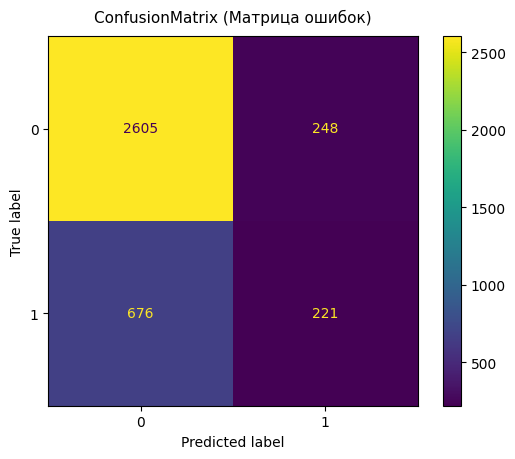

In [ ]:
# Визуализация полученной ранее confusion_matrix (матрицы ошибок):

confusion_matrix_obj = ConfusionMatrixDisplay(confusion_matrix)

confusion_matrix_obj.plot()

plt.title('ConfusionMatrix (Матрица ошибок)',
fontdict={'fontsize':11}, pad=10)

plt.show()

In [ ]:
# Ознакомимся с полученными результатами подробнее -
# как распределены значения внутри них:

y_test.value_counts() # На тестовой (валидационной) выборке

left
0    2853
1     897
Name: count, dtype: int64

In [ ]:
y_pred_df = pd.DataFrame(y_pred).value_counts() # Предсказанное

y_pred_df

# Как можно увидеть по распределению значений, предсказанных моделью,
# модель была более склонна предсказывать, что сотрудники не уволятся,
# чем это было в действительности (предсказано для 3281 сотрудника,
# в то время как в реальности - 2853). И напротив, модель в целом недооценивала
# в своих предсказаниях количество уволившихся (увольнение предсказано
# для 469 сотрудников, в то время как в реальности - 897).

0    3281
1     469
Name: count, dtype: int64

Матрица ошибок (confusion matrix) – таблица с 4 различными комбинациями прогнозируемых и фактических значений. Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные. Матрица ошибок используется для оценки точности моделей в задачах классификации (можно рассматривать решаемую задачу как задачу классификации, т.к. происходит распределение по двум классам: уволившихся и не уволившихся сотрудников).

<br>


**True Positive** (истинно-положительное решение): прогноз совпал с реальностью, результат положительный произошел, как и было предсказано ML-моделью.

**False Positive** (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала положительный результат, а на самом деле он отрицательный.

**False Negative** (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала отрицательный результат, но на самом деле он положительный.

**True Negative** (истинно-отрицательное решение): результат отрицательный, ML-прогноз совпал с реальностью.


In [ ]:
# Итак, True Positive:

TP = confusion_matrix[0, 0]

TP

# В таком количестве случаев модель правильно предсказала тех сотрудников,
# которые НЕ уволились, а остались

2605

In [ ]:
# Итак, False Negative (ошибка второго рода):

FN = confusion_matrix[0, 1]

FN

# В таком количестве случаев модель ошибочно предсказала, что уволятся,
# но в реальности сотрудники остались

248

In [ ]:
# False Positive (ошибка первого рода):

FP = confusion_matrix[1, 0]

FP

# В таком количестве случаев модель ошибочно предсказала,
# что сотрудники останутся, в реальности они уволились

676

In [ ]:
# True Negative:

TN = confusion_matrix[1, 1]

TN

# В таком количестве случаев модель верно предсказала тех, кто уволился

221

In [ ]:
# Теперь можно рассчитать показатель Precision (точность)
# (т.е. какая доля результатов была предсказана верно;
# т.е. доля объектов, названных моделью положительными и при этом действительно
# являющихся положительными):

Precision = TP / (TP + FP)

Precision

0.7939652544955806

In [ ]:
# Рассчитаем также показатель Recall (полнота)
# (т.е. какая доля из истинных результатов была предсказана верно;
# т.е. какую долю объектов положительного класса из всех объектов
# положительного класса верно предсказала модель):

Recall = TP / (TP + FN)

Recall

0.9130739572379951

In [ ]:
# Рассчитаем показатель Accuracy (точность)
# (т.е. доля правильных ответов модели):

Accuracy = (TP + TN) / (TP + FN + TN + FP)

Accuracy

# Отметим, что рассчитанное вручную значение совпало
# с тем значением, которое ранее было получено как accuracy_score -
# результат применения модуля в составе sklearn.metrics

0.7536

In [ ]:
# Рассчитаем показатель F-мера
# (позволяет сравнить 2 модели, одновременно оценив точность и полноту,
# т.е. сводит к одному числу две основополагающих метрики: точность и полноту).
# Здесь используется среднее гармоническое вместо среднего арифметического,
# сглаживая расчеты за счет исключения экстремальных значений):

F = 2 / ((1/Precision) + (1/Recall))

F

0.8493641995435279

Таким образом, если основываться на показателе точности Accuracy, модель точно предсказывала, уволится ли сотрудник, в 75% случаев. Если же рассматривать сводный показатель F-меры, модель была точна в предсказаниях факта увольнения в 85% случаев (В обоих случаях оценка качества модели производилась в сопоставлении с тестовой (валидационной) выборкой).

Т.е. качество предсказания модели можно считать относительно высоким.



---



## **ЗАДАНИЕ 10**

**Загрузить jupyter notebook с решением на github и прислать ссылку.**

https://github.com/DilyaraKhakim/Python_for_Data_Analysis_EDA_ML-LDA-/blob/main/Netology_Python_for_Data_Analysis_FINAL_WORK.ipynb



---





---

